# EDA Train

## Librerías

In [1]:
# Librerías para visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns

# Librerías para manipulación y análisis de datos
import numpy as np
import pandas as pd

from toolbox_DS import *
from toolbox_ML import *

## Carga de datos (train_set)

In [2]:
train_set = pd.read_csv('./data/train_set.csv')
train_set

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Complain,Response,age,customes_seniority,Household_members,Total_amount,Total_purchase,Median_amount_purchase,Total_cmp,Total_%_cmp
0,9400,1958,2n Cycle,Single,85485.0,0,0,2014-06-21,73,630,...,0,0,62,6,1.0,1383,19,72.789474,0,0.0
1,2804,1975,Master,Single,46098.0,1,1,2012-08-18,86,57,...,0,1,45,8,3.0,120,11,10.909091,0,0.0
2,1503,1976,PhD,Together,162397.0,1,1,2013-06-03,31,85,...,0,0,44,7,4.0,107,1,107.000000,0,0.0
3,5491,1951,Master,Together,47352.0,0,1,2013-04-11,70,172,...,0,0,69,7,3.0,319,16,19.937500,0,0.0
4,2894,1985,Graduation,Single,72903.0,0,0,2013-10-29,74,1067,...,0,1,35,7,1.0,2013,21,95.857143,3,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1785,10785,1969,Graduation,Married,44078.0,1,1,2014-06-19,17,24,...,0,0,51,6,4.0,41,7,5.857143,0,0.0
1786,9964,1979,Graduation,Single,61825.0,0,1,2013-08-07,56,162,...,0,0,41,7,2.0,424,15,28.266667,0,0.0
1787,3412,1951,Master,Married,67381.0,0,1,2013-01-15,67,815,...,0,0,69,7,3.0,957,17,56.294118,1,0.2
1788,2811,1963,PhD,Single,48918.0,1,1,2014-04-12,21,52,...,0,0,57,6,3.0,62,7,8.857143,0,0.0


In [3]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1790 entries, 0 to 1789
Data columns (total 35 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      1790 non-null   int64  
 1   Year_Birth              1790 non-null   int64  
 2   Education               1790 non-null   object 
 3   Marital_Status          1790 non-null   object 
 4   Income                  1790 non-null   float64
 5   Kidhome                 1790 non-null   int64  
 6   Teenhome                1790 non-null   int64  
 7   Dt_Customer             1790 non-null   object 
 8   Recency                 1790 non-null   int64  
 9   MntWines                1790 non-null   int64  
 10  MntFruits               1790 non-null   int64  
 11  MntMeatProducts         1790 non-null   int64  
 12  MntFishProducts         1790 non-null   int64  
 13  MntSweetProducts        1790 non-null   int64  
 14  MntGoldProds            1790 non-null   

In [4]:
# Cambio el índice
train_set.set_index('ID', inplace=True)

# Cambio tipo a datetime
train_set['Dt_Customer'] = pd.to_datetime(train_set['Dt_Customer'])

# Cambiar tipo a categóricas
cols_to_category = ['Education', 'Marital_Status',  
                        'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 
                        'AcceptedCmp1', 'AcceptedCmp2', 'Complain']
train_set[cols_to_category] = train_set[cols_to_category].astype('category')

In [5]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1790 entries, 9400 to 4297
Data columns (total 34 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Year_Birth              1790 non-null   int64         
 1   Education               1790 non-null   category      
 2   Marital_Status          1790 non-null   category      
 3   Income                  1790 non-null   float64       
 4   Kidhome                 1790 non-null   int64         
 5   Teenhome                1790 non-null   int64         
 6   Dt_Customer             1790 non-null   datetime64[ns]
 7   Recency                 1790 non-null   int64         
 8   MntWines                1790 non-null   int64         
 9   MntFruits               1790 non-null   int64         
 10  MntMeatProducts         1790 non-null   int64         
 11  MntFishProducts         1790 non-null   int64         
 12  MntSweetProducts        1790 non-null   int64     

### Listado features

In [6]:
features_num = train_set.select_dtypes('number').columns
features_cat = train_set.select_dtypes('category').columns
print(features_num)
print(features_cat)

Index(['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Response', 'age', 'customes_seniority', 'Household_members',
       'Total_amount', 'Total_purchase', 'Median_amount_purchase', 'Total_cmp',
       'Total_%_cmp'],
      dtype='object')
Index(['Education', 'Marital_Status', 'AcceptedCmp3', 'AcceptedCmp4',
       'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain'],
      dtype='object')


In [7]:
target = 'Response'

# Analisis univariable

### Categóricas

Para Education
*************************


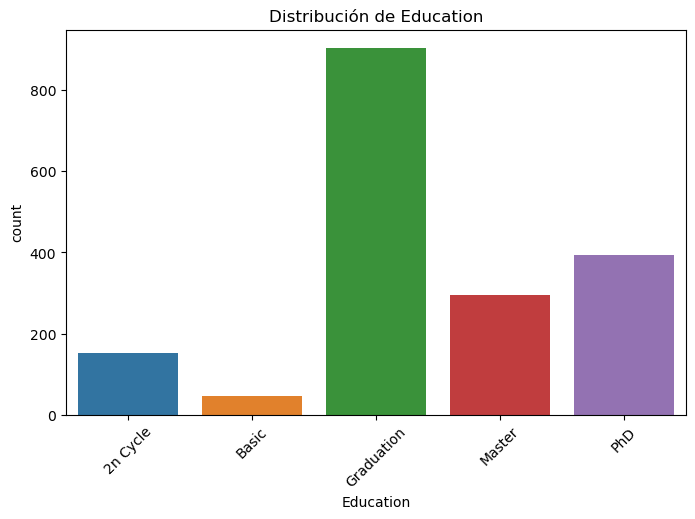

Frecuencia de categorías en Education:
Education
Graduation    904
PhD           393
Master        294
2n Cycle      153
Basic          46
Name: count, dtype: int64

Porcentaje de categorías en Education:
Education
Graduation    50.50
PhD           21.96
Master        16.42
2n Cycle       8.55
Basic          2.57
Name: proportion, dtype: float64

La moda es Graduation con una frecuencia de 904
Proporción de la moda: 50.50%

Para Marital_Status
*************************


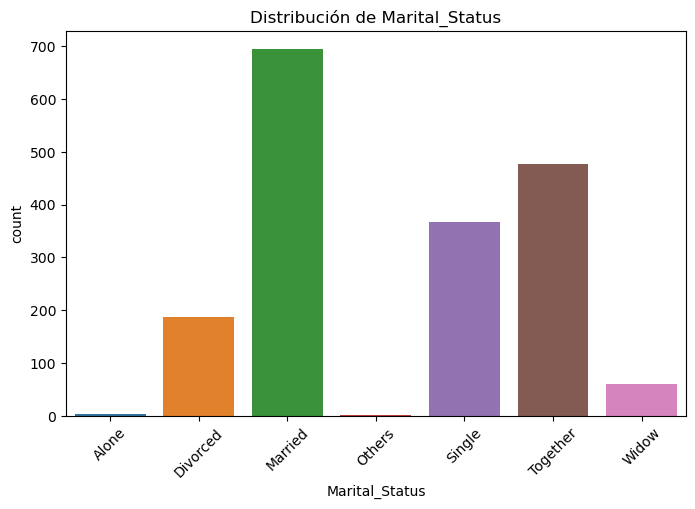

Frecuencia de categorías en Marital_Status:
Marital_Status
Married     694
Together    477
Single      367
Divorced    187
Widow        60
Alone         3
Others        2
Name: count, dtype: int64

Porcentaje de categorías en Marital_Status:
Marital_Status
Married     38.77
Together    26.65
Single      20.50
Divorced    10.45
Widow        3.35
Alone        0.17
Others       0.11
Name: proportion, dtype: float64

La moda es Married con una frecuencia de 694
Proporción de la moda: 38.77%

Para AcceptedCmp3
*************************


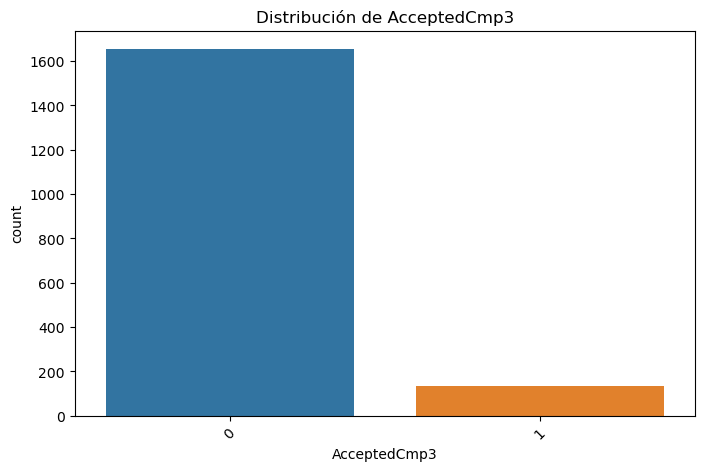

Frecuencia de categorías en AcceptedCmp3:
AcceptedCmp3
0    1655
1     135
Name: count, dtype: int64

Porcentaje de categorías en AcceptedCmp3:
AcceptedCmp3
0    92.46
1     7.54
Name: proportion, dtype: float64

La moda es 0 con una frecuencia de 1655
Proporción de la moda: 92.46%

Para AcceptedCmp4
*************************


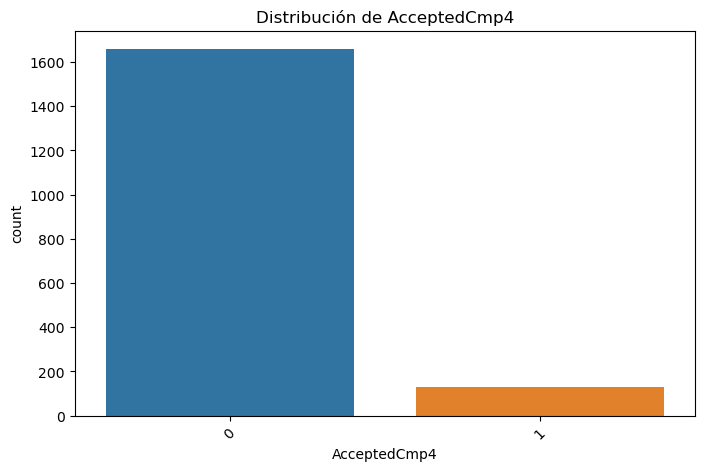

Frecuencia de categorías en AcceptedCmp4:
AcceptedCmp4
0    1659
1     131
Name: count, dtype: int64

Porcentaje de categorías en AcceptedCmp4:
AcceptedCmp4
0    92.68
1     7.32
Name: proportion, dtype: float64

La moda es 0 con una frecuencia de 1659
Proporción de la moda: 92.68%

Para AcceptedCmp5
*************************


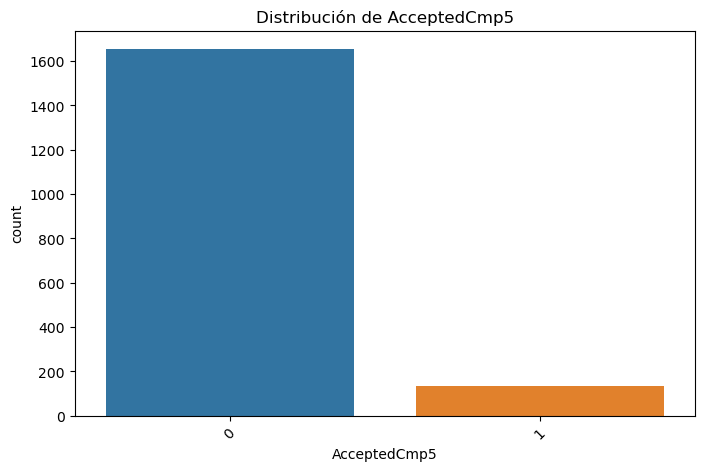

Frecuencia de categorías en AcceptedCmp5:
AcceptedCmp5
0    1655
1     135
Name: count, dtype: int64

Porcentaje de categorías en AcceptedCmp5:
AcceptedCmp5
0    92.46
1     7.54
Name: proportion, dtype: float64

La moda es 0 con una frecuencia de 1655
Proporción de la moda: 92.46%

Para AcceptedCmp1
*************************


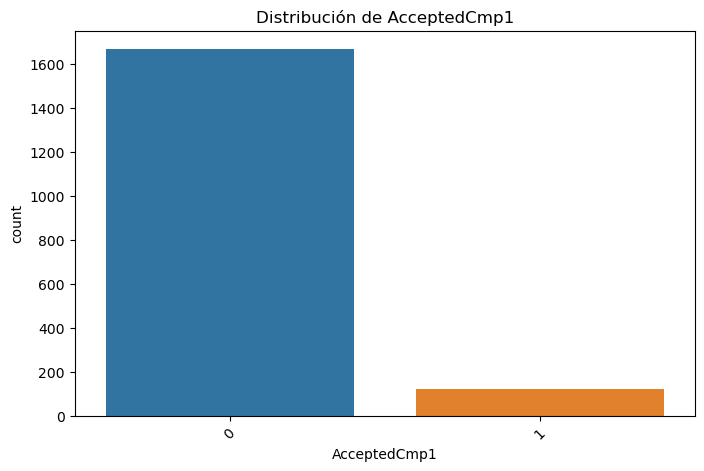

Frecuencia de categorías en AcceptedCmp1:
AcceptedCmp1
0    1669
1     121
Name: count, dtype: int64

Porcentaje de categorías en AcceptedCmp1:
AcceptedCmp1
0    93.24
1     6.76
Name: proportion, dtype: float64

La moda es 0 con una frecuencia de 1669
Proporción de la moda: 93.24%

Para AcceptedCmp2
*************************


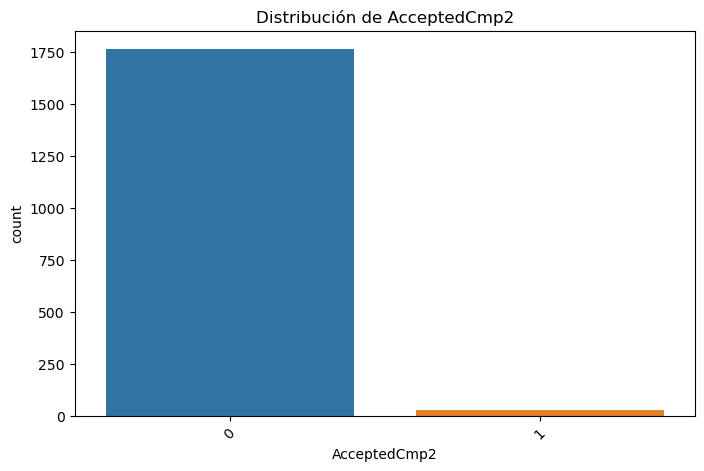

Frecuencia de categorías en AcceptedCmp2:
AcceptedCmp2
0    1765
1      25
Name: count, dtype: int64

Porcentaje de categorías en AcceptedCmp2:
AcceptedCmp2
0    98.6
1     1.4
Name: proportion, dtype: float64

La moda es 0 con una frecuencia de 1765
Proporción de la moda: 98.60%

Para Complain
*************************


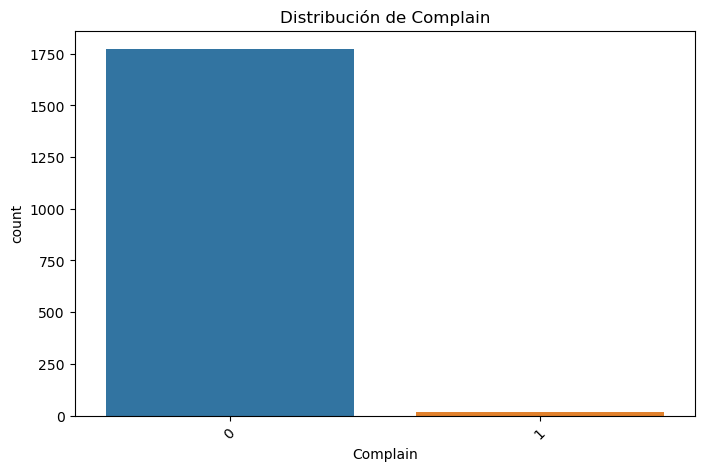

Frecuencia de categorías en Complain:
Complain
0    1773
1      17
Name: count, dtype: int64

Porcentaje de categorías en Complain:
Complain
0    99.05
1     0.95
Name: proportion, dtype: float64

La moda es 0 con una frecuencia de 1773
Proporción de la moda: 99.05%



In [8]:
analisis_univariable_categoricas(train_set,features_cat)

### Numéricas

Para Year_Birth
*************************


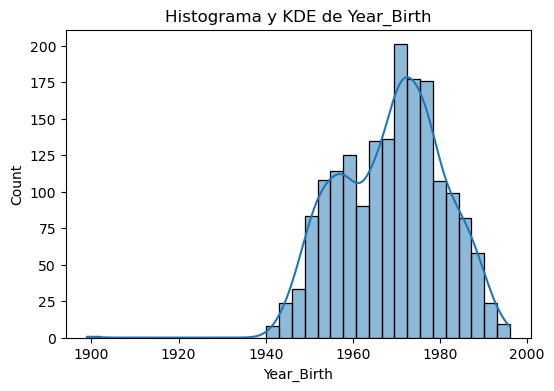

count    1790.00
mean     1968.84
std        11.81
min      1899.00
25%      1959.00
50%      1970.00
75%      1977.00
max      1996.00
Name: Year_Birth, dtype: float64

La moda es 1971.00, el coeficiente de variación es 0.60% y el IQR es 18.00

Prueba Shapiro-Wilk: p-value=0.0000. No tiene distribución normal

Se puede considerar simétrica

Curtosis: -0.19. Poco riesgo de valores atípicos

Prueba Jarque-Bera: p-value=0.0004

Prueba Anderson-Darling: estadístico=8.03

Outliers:
Los outliers inferiores son 1 y suponen en proporción 0.06%

Los outliers superiores son 0 y suponen en proporción 0.0%

Para Income
*************************


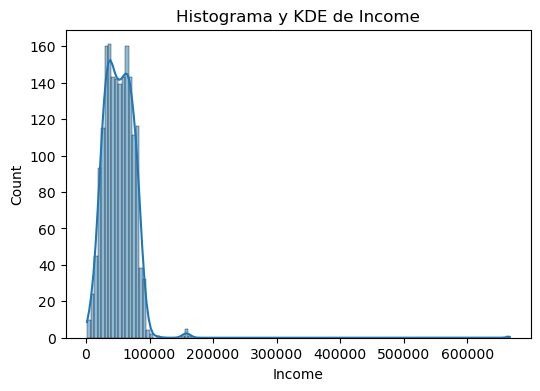

count      1790.00
mean      52068.83
std       26144.11
min        1730.00
25%       34759.50
50%       51277.00
75%       68146.50
max      666666.00
Name: Income, dtype: float64

La moda es 7500.00, el coeficiente de variación es 50.21% y el IQR es 33387.00

Prueba Shapiro-Wilk: p-value=0.0000. No tiene distribución normal

Asimetría: 7.48, valores extendidos a la derecha

Curtosis: 169.71. Riesgo de valores atípicos

Prueba Jarque-Bera: p-value=0.0000

Prueba Anderson-Darling: estadístico=17.47

Outliers:
Los outliers inferiores son 0 y suponen en proporción 0.0%

Los outliers superiores son 1 y suponen en proporción 0.06%

La variable Income puede necesitar una transformación logarítmica debido a heavy tail:
curtosis=169.71, asimetria=7.48

Para Kidhome
*************************


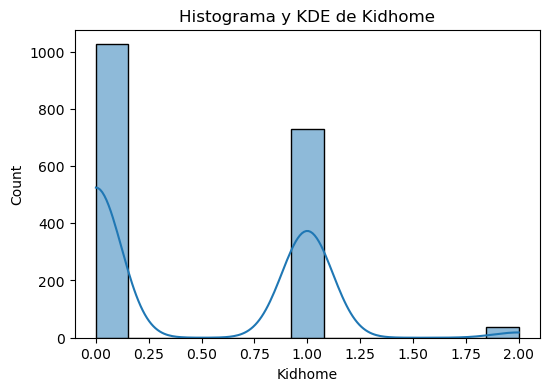

count    1790.00
mean        0.45
std         0.54
min         0.00
25%         0.00
50%         0.00
75%         1.00
max         2.00
Name: Kidhome, dtype: float64

La moda es 0.00, el coeficiente de variación es 119.85% y el IQR es 1.00

Prueba Shapiro-Wilk: p-value=0.0000. No tiene distribución normal

Asimetría: 0.60, valores extendidos a la derecha

Curtosis: -0.85. Poco riesgo de valores atípicos

Prueba Jarque-Bera: p-value=0.0000

Prueba Anderson-Darling: estadístico=285.18

Outliers:
Los outliers inferiores son 0 y suponen en proporción 0.0%

Los outliers superiores son 0 y suponen en proporción 0.0%

Para Teenhome
*************************


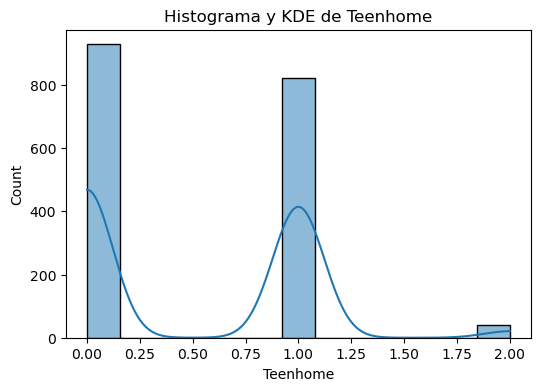

count    1790.00
mean        0.50
std         0.54
min         0.00
25%         0.00
50%         0.00
75%         1.00
max         2.00
Name: Teenhome, dtype: float64

La moda es 0.00, el coeficiente de variación es 107.84% y el IQR es 1.00

Prueba Shapiro-Wilk: p-value=0.0000. No tiene distribución normal

Se puede considerar simétrica

Curtosis: -0.99. Poco riesgo de valores atípicos

Prueba Jarque-Bera: p-value=0.0000

Prueba Anderson-Darling: estadístico=269.68

Outliers:
Los outliers inferiores son 0 y suponen en proporción 0.0%

Los outliers superiores son 0 y suponen en proporción 0.0%

Para Recency
*************************


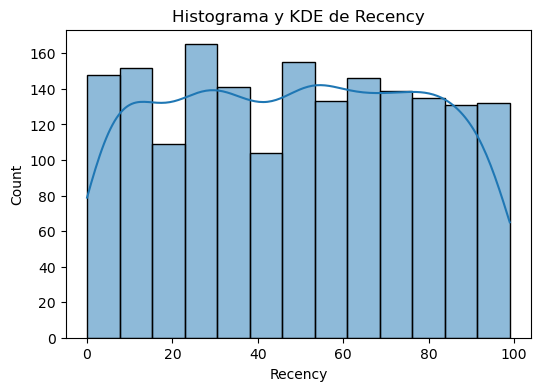

count    1790.00
mean       48.77
std        28.75
min         0.00
25%        25.00
50%        49.00
75%        73.00
max        99.00
Name: Recency, dtype: float64

La moda es 56.00, el coeficiente de variación es 58.95% y el IQR es 48.00

Prueba Shapiro-Wilk: p-value=0.0000. No tiene distribución normal

Se puede considerar simétrica

Curtosis: -1.19. Poco riesgo de valores atípicos

Prueba Jarque-Bera: p-value=0.0000

Prueba Anderson-Darling: estadístico=19.17

Outliers:
Los outliers inferiores son 0 y suponen en proporción 0.0%

Los outliers superiores son 0 y suponen en proporción 0.0%

Para MntWines
*************************


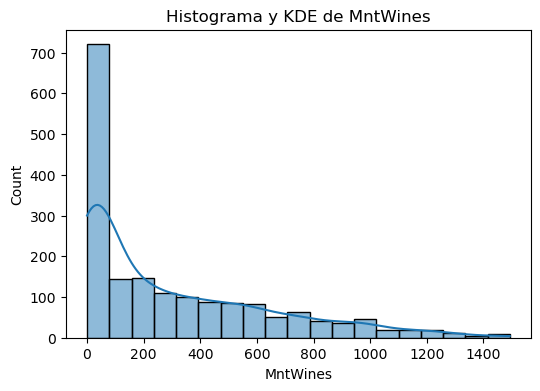

count    1790.00
mean      303.26
std       340.12
min         0.00
25%        23.00
50%       167.50
75%       508.00
max      1493.00
Name: MntWines, dtype: float64

La moda es 5.00, el coeficiente de variación es 112.15% y el IQR es 485.00

Prueba Shapiro-Wilk: p-value=0.0000. No tiene distribución normal

Asimetría: 1.19, valores extendidos a la derecha

Curtosis: 0.63. Poco riesgo de valores atípicos

Prueba Jarque-Bera: p-value=0.0000

Prueba Anderson-Darling: estadístico=102.26

Outliers:
Los outliers inferiores son 0 y suponen en proporción 0.0%

Los outliers superiores son 0 y suponen en proporción 0.0%

Para MntFruits
*************************


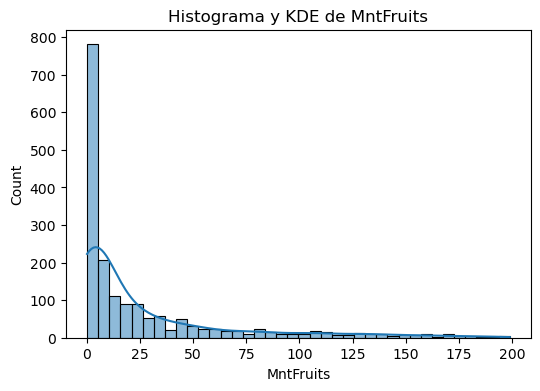

count    1790.00
mean       26.31
std        40.13
min         0.00
25%         1.00
50%         8.00
75%        33.00
max       199.00
Name: MntFruits, dtype: float64

La moda es 0.00, el coeficiente de variación es 152.55% y el IQR es 32.00

Prueba Shapiro-Wilk: p-value=0.0000. No tiene distribución normal

Asimetría: 2.09, valores extendidos a la derecha

Curtosis: 3.92. Riesgo de valores atípicos

Prueba Jarque-Bera: p-value=0.0000

Prueba Anderson-Darling: estadístico=205.48

Outliers:
Los outliers inferiores son 0 y suponen en proporción 0.0%

Los outliers superiores son 79 y suponen en proporción 4.41%

La variable MntFruits puede necesitar una transformación logarítmica debido a heavy tail:
curtosis=3.92, asimetria=2.09

Para MntMeatProducts
*************************


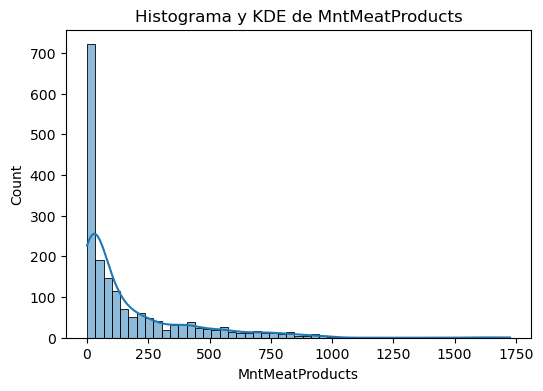

count    1790.00
mean      165.88
std       228.46
min         0.00
25%        15.00
50%        64.00
75%       223.75
max      1725.00
Name: MntMeatProducts, dtype: float64

La moda es 11.00, el coeficiente de variación es 137.73% y el IQR es 208.75

Prueba Shapiro-Wilk: p-value=0.0000. No tiene distribución normal

Asimetría: 2.16, valores extendidos a la derecha

Curtosis: 6.12. Riesgo de valores atípicos

Prueba Jarque-Bera: p-value=0.0000

Prueba Anderson-Darling: estadístico=169.74

Outliers:
Los outliers inferiores son 0 y suponen en proporción 0.0%

Los outliers superiores son 27 y suponen en proporción 1.51%

La variable MntMeatProducts puede necesitar una transformación logarítmica debido a heavy tail:
curtosis=6.12, asimetria=2.16

Para MntFishProducts
*************************


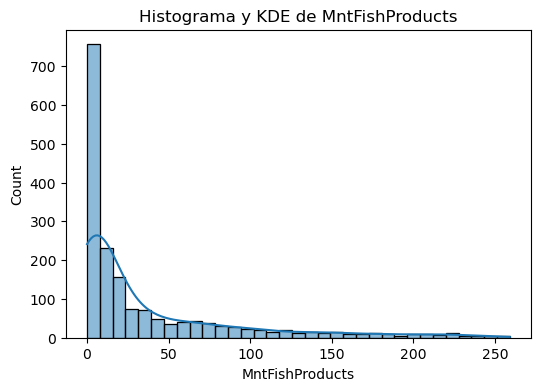

count    1790.00
mean       36.88
std        54.26
min         0.00
25%         2.00
50%        12.00
75%        49.75
max       259.00
Name: MntFishProducts, dtype: float64

La moda es 0.00, el coeficiente de variación es 147.14% y el IQR es 47.75

Prueba Shapiro-Wilk: p-value=0.0000. No tiene distribución normal

Asimetría: 1.97, valores extendidos a la derecha

Curtosis: 3.36. Riesgo de valores atípicos

Prueba Jarque-Bera: p-value=0.0000

Prueba Anderson-Darling: estadístico=193.95

Outliers:
Los outliers inferiores son 0 y suponen en proporción 0.0%

Los outliers superiores son 57 y suponen en proporción 3.18%

La variable MntFishProducts puede necesitar una transformación logarítmica debido a heavy tail:
curtosis=3.36, asimetria=1.97

Para MntSweetProducts
*************************


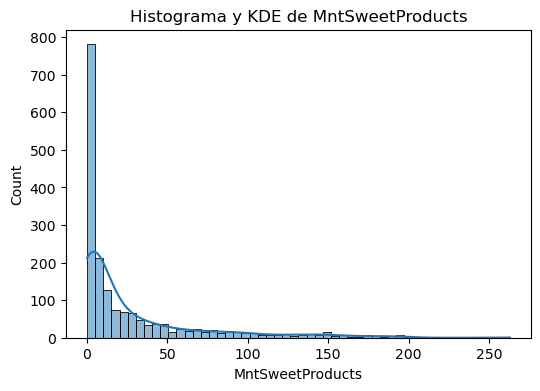

count    1790.00
mean       26.53
std        41.25
min         0.00
25%         1.00
50%         8.00
75%        32.00
max       263.00
Name: MntSweetProducts, dtype: float64

La moda es 0.00, el coeficiente de variación es 155.50% y el IQR es 31.00

Prueba Shapiro-Wilk: p-value=0.0000. No tiene distribución normal

Asimetría: 2.21, valores extendidos a la derecha

Curtosis: 4.81. Riesgo de valores atípicos

Prueba Jarque-Bera: p-value=0.0000

Prueba Anderson-Darling: estadístico=208.24

Outliers:
Los outliers inferiores son 0 y suponen en proporción 0.0%

Los outliers superiores son 91 y suponen en proporción 5.08%

La variable MntSweetProducts puede necesitar una transformación logarítmica debido a heavy tail:
curtosis=4.81, asimetria=2.21

Para MntGoldProds
*************************


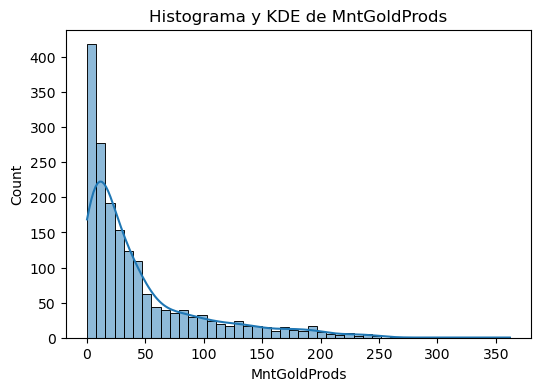

count    1790.00
mean       44.01
std        52.62
min         0.00
25%         8.00
50%        24.00
75%        56.75
max       362.00
Name: MntGoldProds, dtype: float64

La moda es 1.00, el coeficiente de variación es 119.57% y el IQR es 48.75

Prueba Shapiro-Wilk: p-value=0.0000. No tiene distribución normal

Asimetría: 1.89, valores extendidos a la derecha

Curtosis: 3.60. Riesgo de valores atípicos

Prueba Jarque-Bera: p-value=0.0000

Prueba Anderson-Darling: estadístico=140.67

Outliers:
Los outliers inferiores son 0 y suponen en proporción 0.0%

Los outliers superiores son 34 y suponen en proporción 1.9%

La variable MntGoldProds puede necesitar una transformación logarítmica debido a heavy tail:
curtosis=3.60, asimetria=1.89

Para NumDealsPurchases
*************************


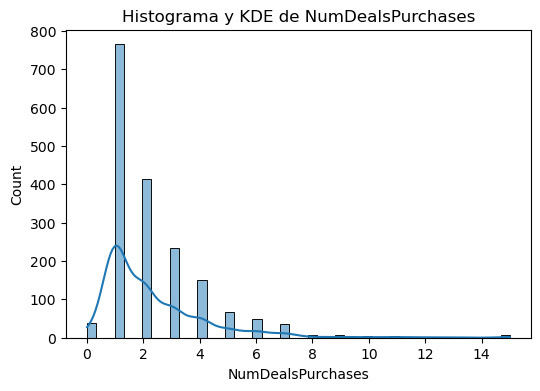

count    1790.00
mean        2.32
std         1.94
min         0.00
25%         1.00
50%         2.00
75%         3.00
max        15.00
Name: NumDealsPurchases, dtype: float64

La moda es 1.00, el coeficiente de variación es 83.60% y el IQR es 2.00

Prueba Shapiro-Wilk: p-value=0.0000. No tiene distribución normal

Asimetría: 2.51, valores extendidos a la derecha

Curtosis: 9.56. Riesgo de valores atípicos

Prueba Jarque-Bera: p-value=0.0000

Prueba Anderson-Darling: estadístico=135.99

Outliers:
Los outliers inferiores son 0 y suponen en proporción 0.0%

Los outliers superiores son 21 y suponen en proporción 1.17%

La variable NumDealsPurchases puede necesitar una transformación logarítmica debido a heavy tail:
curtosis=9.56, asimetria=2.51

Para NumWebPurchases
*************************


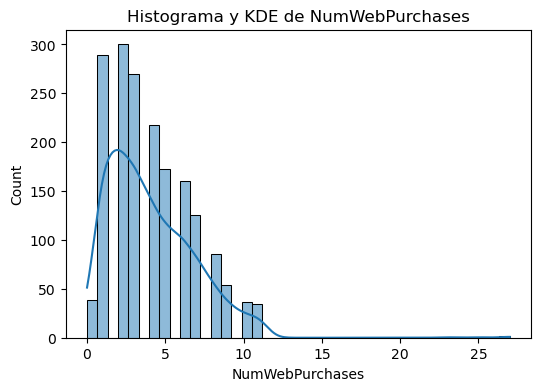

count    1790.00
mean        4.08
std         2.82
min         0.00
25%         2.00
50%         3.00
75%         6.00
max        27.00
Name: NumWebPurchases, dtype: float64

La moda es 2.00, el coeficiente de variación es 69.14% y el IQR es 4.00

Prueba Shapiro-Wilk: p-value=0.0000. No tiene distribución normal

Asimetría: 1.52, valores extendidos a la derecha

Curtosis: 6.76. Riesgo de valores atípicos

Prueba Jarque-Bera: p-value=0.0000

Prueba Anderson-Darling: estadístico=39.11

Outliers:
Los outliers inferiores son 0 y suponen en proporción 0.0%

Los outliers superiores son 4 y suponen en proporción 0.22%

La variable NumWebPurchases puede necesitar una transformación logarítmica debido a heavy tail:
curtosis=6.76, asimetria=1.52

Para NumCatalogPurchases
*************************


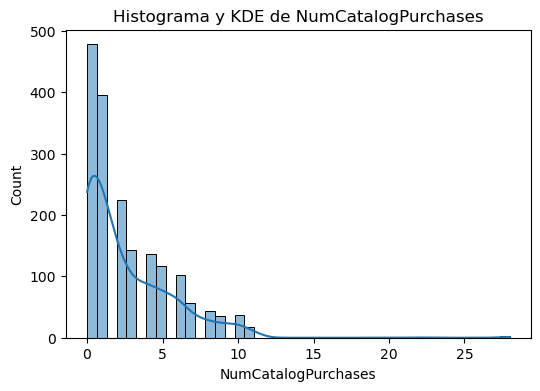

count    1790.00
mean        2.65
std         2.97
min         0.00
25%         0.00
50%         2.00
75%         4.00
max        28.00
Name: NumCatalogPurchases, dtype: float64

La moda es 0.00, el coeficiente de variación es 112.20% y el IQR es 4.00

Prueba Shapiro-Wilk: p-value=0.0000. No tiene distribución normal

Asimetría: 2.05, valores extendidos a la derecha

Curtosis: 9.40. Riesgo de valores atípicos

Prueba Jarque-Bera: p-value=0.0000

Prueba Anderson-Darling: estadístico=90.26

Outliers:
Los outliers inferiores son 0 y suponen en proporción 0.0%

Los outliers superiores son 4 y suponen en proporción 0.22%

La variable NumCatalogPurchases puede necesitar una transformación logarítmica debido a heavy tail:
curtosis=9.40, asimetria=2.05

Para NumStorePurchases
*************************


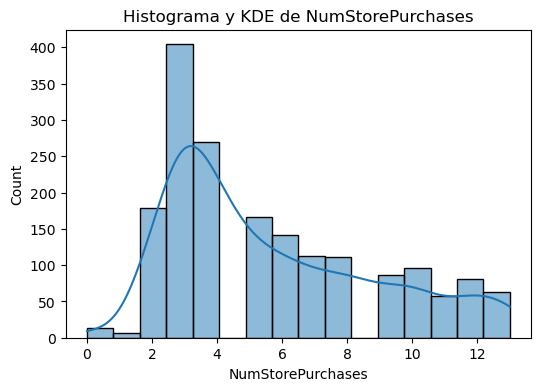

count    1790.00
mean        5.69
std         3.22
min         0.00
25%         3.00
50%         5.00
75%         8.00
max        13.00
Name: NumStorePurchases, dtype: float64

La moda es 3.00, el coeficiente de variación es 56.65% y el IQR es 5.00

Prueba Shapiro-Wilk: p-value=0.0000. No tiene distribución normal

Asimetría: 0.75, valores extendidos a la derecha

Curtosis: -0.53. Poco riesgo de valores atípicos

Prueba Jarque-Bera: p-value=0.0000

Prueba Anderson-Darling: estadístico=65.71

Outliers:
Los outliers inferiores son 0 y suponen en proporción 0.0%

Los outliers superiores son 0 y suponen en proporción 0.0%

Para NumWebVisitsMonth
*************************


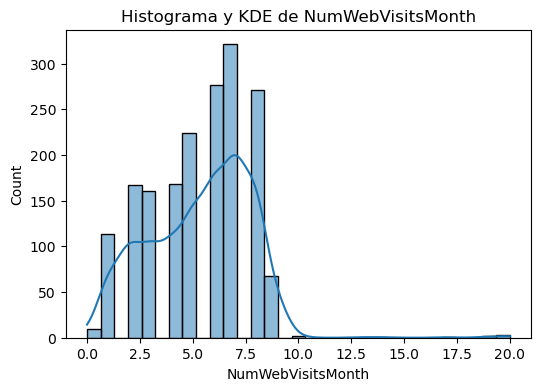

count    1790.00
mean        5.35
std         2.44
min         0.00
25%         3.00
50%         6.00
75%         7.00
max        20.00
Name: NumWebVisitsMonth, dtype: float64

La moda es 7.00, el coeficiente de variación es 45.60% y el IQR es 4.00

Prueba Shapiro-Wilk: p-value=0.0000. No tiene distribución normal

Se puede considerar simétrica

Curtosis: 2.35. Poco riesgo de valores atípicos

Prueba Jarque-Bera: p-value=0.0000

Prueba Anderson-Darling: estadístico=31.18

Outliers:
Los outliers inferiores son 0 y suponen en proporción 0.0%

Los outliers superiores son 3 y suponen en proporción 0.17%

Para Response
*************************


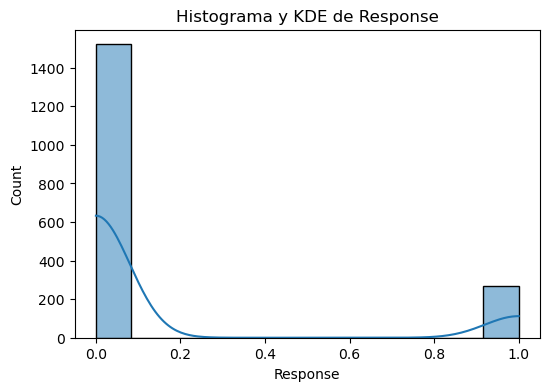

count    1790.00
mean        0.15
std         0.36
min         0.00
25%         0.00
50%         0.00
75%         0.00
max         1.00
Name: Response, dtype: float64

La moda es 0.00, el coeficiente de variación es 237.85% y el IQR es 0.00

Prueba Shapiro-Wilk: p-value=0.0000. No tiene distribución normal

Asimetría: 1.96, valores extendidos a la derecha

Curtosis: 1.83. Poco riesgo de valores atípicos

Prueba Jarque-Bera: p-value=0.0000

Prueba Anderson-Darling: estadístico=530.72

Outliers:
Los outliers inferiores son 0 y suponen en proporción 0.0%

Los outliers superiores son 269 y suponen en proporción 15.03%

Para age
*************************


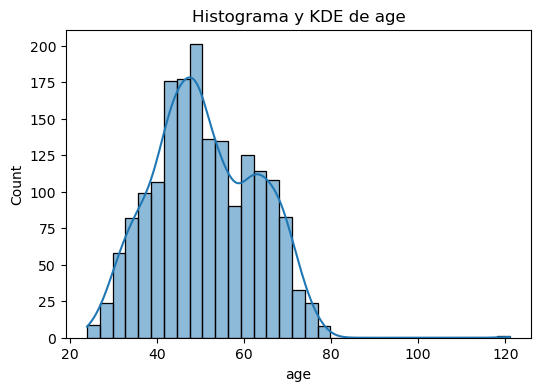

count    1790.00
mean       51.16
std        11.81
min        24.00
25%        43.00
50%        50.00
75%        61.00
max       121.00
Name: age, dtype: float64

La moda es 49.00, el coeficiente de variación es 23.09% y el IQR es 18.00

Prueba Shapiro-Wilk: p-value=0.0000. No tiene distribución normal

Se puede considerar simétrica

Curtosis: -0.19. Poco riesgo de valores atípicos

Prueba Jarque-Bera: p-value=0.0004

Prueba Anderson-Darling: estadístico=8.03

Outliers:
Los outliers inferiores son 0 y suponen en proporción 0.0%

Los outliers superiores son 1 y suponen en proporción 0.06%

Para customes_seniority
*************************


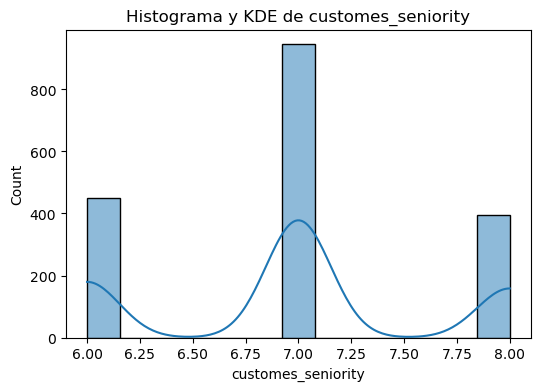

count    1790.00
mean        6.97
std         0.69
min         6.00
25%         6.00
50%         7.00
75%         7.00
max         8.00
Name: customes_seniority, dtype: float64

La moda es 7.00, el coeficiente de variación es 9.85% y el IQR es 1.00

Prueba Shapiro-Wilk: p-value=0.0000. No tiene distribución normal

Se puede considerar simétrica

Curtosis: -0.88. Poco riesgo de valores atípicos

Prueba Jarque-Bera: p-value=0.0000

Prueba Anderson-Darling: estadístico=155.60

Outliers:
Los outliers inferiores son 0 y suponen en proporción 0.0%

Los outliers superiores son 0 y suponen en proporción 0.0%

Para Household_members
*************************


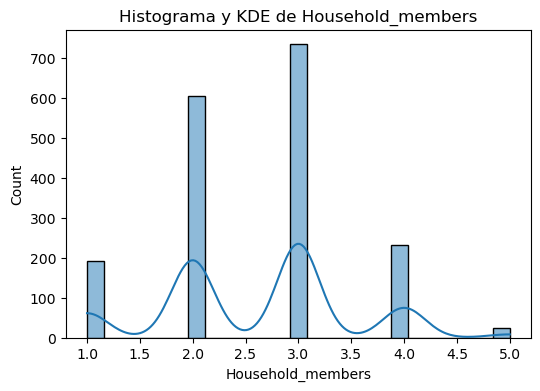

count    1790.00
mean        2.61
std         0.89
min         1.00
25%         2.00
50%         3.00
75%         3.00
max         5.00
Name: Household_members, dtype: float64

La moda es 3.00, el coeficiente de variación es 34.25% y el IQR es 1.00

Prueba Shapiro-Wilk: p-value=0.0000. No tiene distribución normal

Se puede considerar simétrica

Curtosis: -0.29. Poco riesgo de valores atípicos

Prueba Jarque-Bera: p-value=0.0180

Prueba Anderson-Darling: estadístico=92.41

Outliers:
Los outliers inferiores son 0 y suponen en proporción 0.0%

Los outliers superiores son 0 y suponen en proporción 0.0%

Para Total_amount
*************************


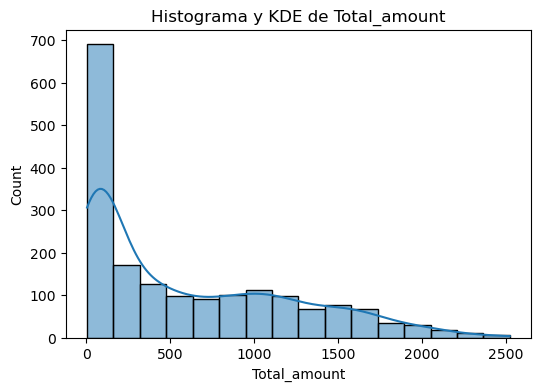

count    1790.00
mean      602.86
std       606.79
min         5.00
25%        67.00
50%       369.00
75%      1042.75
max      2525.00
Name: Total_amount, dtype: float64

La moda es 57.00, el coeficiente de variación es 100.65% y el IQR es 975.75

Prueba Shapiro-Wilk: p-value=0.0000. No tiene distribución normal

Asimetría: 0.88, valores extendidos a la derecha

Curtosis: -0.33. Poco riesgo de valores atípicos

Prueba Jarque-Bera: p-value=0.0000

Prueba Anderson-Darling: estadístico=90.28

Outliers:
Los outliers inferiores son 0 y suponen en proporción 0.0%

Los outliers superiores son 0 y suponen en proporción 0.0%

Para Total_purchase
*************************


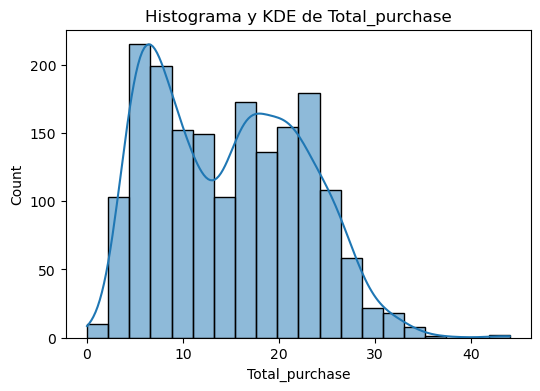

count    1790.00
mean       14.73
std         7.67
min         0.00
25%         7.00
50%        15.00
75%        21.00
max        44.00
Name: Total_purchase, dtype: float64

La moda es 7.00, el coeficiente de variación es 52.04% y el IQR es 14.00

Prueba Shapiro-Wilk: p-value=0.0000. No tiene distribución normal

Se puede considerar simétrica

Curtosis: -0.86. Poco riesgo de valores atípicos

Prueba Jarque-Bera: p-value=0.0000

Prueba Anderson-Darling: estadístico=26.99

Outliers:
Los outliers inferiores son 0 y suponen en proporción 0.0%

Los outliers superiores son 0 y suponen en proporción 0.0%

Para Median_amount_purchase
*************************


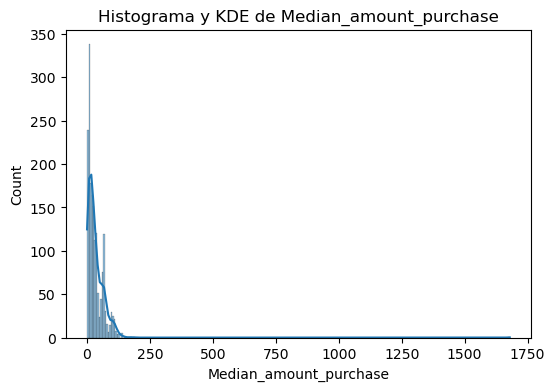

count    1790.00
mean         inf
std          NaN
min         0.53
25%         9.50
50%        23.06
75%        45.71
max          inf
Name: Median_amount_purchase, dtype: float64

La moda es 5.00, el coeficiente de variación es nan% y el IQR es 36.21

Prueba Shapiro-Wilk: p-value=1.0000. Tiene distribución normal

Prueba Jarque-Bera: p-value=nan

Prueba Anderson-Darling: estadístico=nan

Outliers:
Los outliers inferiores son 0 y suponen en proporción 0.0%

Los outliers superiores son 6 y suponen en proporción 0.34%

Para Total_cmp
*************************


c:\Users\Alfonso\miniconda3\Lib\site-packages\scipy\stats\_stats_py.py:1070: RuntimeWarning: invalid value encountered in subtract
  a_zero_mean = a - mean
c:\Users\Alfonso\miniconda3\Lib\site-packages\scipy\stats\_stats_py.py:2154: RuntimeWarning: invalid value encountered in subtract
  diffx = x - mu
c:\Users\Alfonso\miniconda3\Lib\site-packages\scipy\stats\_morestats.py:2121: RuntimeWarning: invalid value encountered in subtract
  w = (y - xbar) / s
c:\Users\Alfonso\miniconda3\Lib\site-packages\scipy\stats\_distn_infrastructure.py:1498: RuntimeWarning: invalid value encountered in subtract
  x = (asarray(x)-loc) / scale


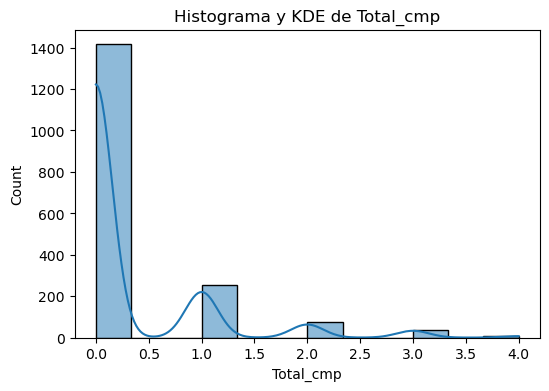

count    1790.00
mean        0.31
std         0.69
min         0.00
25%         0.00
50%         0.00
75%         0.00
max         4.00
Name: Total_cmp, dtype: float64

La moda es 0.00, el coeficiente de variación es 225.54% y el IQR es 0.00

Prueba Shapiro-Wilk: p-value=0.0000. No tiene distribución normal

Asimetría: 2.64, valores extendidos a la derecha

Curtosis: 7.33. Riesgo de valores atípicos

Prueba Jarque-Bera: p-value=0.0000

Prueba Anderson-Darling: estadístico=390.05

Outliers:
Los outliers inferiores son 0 y suponen en proporción 0.0%

Los outliers superiores son 374 y suponen en proporción 20.89%

La variable Total_cmp puede necesitar una transformación logarítmica debido a heavy tail:
curtosis=7.33, asimetria=2.64

Para Total_%_cmp
*************************


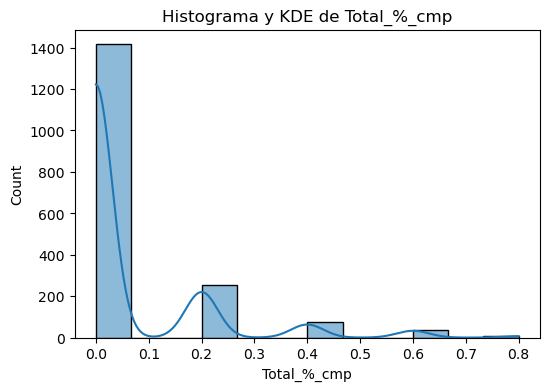

count    1790.00
mean        0.06
std         0.14
min         0.00
25%         0.00
50%         0.00
75%         0.00
max         0.80
Name: Total_%_cmp, dtype: float64

La moda es 0.00, el coeficiente de variación es 225.54% y el IQR es 0.00

Prueba Shapiro-Wilk: p-value=0.0000. No tiene distribución normal

Asimetría: 2.64, valores extendidos a la derecha

Curtosis: 7.33. Riesgo de valores atípicos

Prueba Jarque-Bera: p-value=0.0000

Prueba Anderson-Darling: estadístico=390.05

Outliers:
Los outliers inferiores son 0 y suponen en proporción 0.0%

Los outliers superiores son 374 y suponen en proporción 20.89%

La variable Total_%_cmp puede necesitar una transformación logarítmica debido a heavy tail:
curtosis=7.33, asimetria=2.64

features_log: ['Income', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'Total_cmp', 'Total_%_cmp']

features_no_log: ['Year_Birth', 'Kidhome', 'Teenhome

,Shapiro,Jarque_Bera,Anderson,Asimetría,Curtosis,Outliers_inf_pro,Outliers_sup_pro,Log_transform
Year_Birth,0.0,0.0004,8.03,-0.21,-0.19,0.06,0.00,False
Income,0.0,0.0000,17.47,7.48,169.71,0.00,0.06,True
Kidhome,0.0,0.0000,285.18,0.60,-0.85,0.00,0.00,False
Teenhome,0.0,0.0000,269.68,0.41,-0.99,0.00,0.00,False
Recency,0.0,0.0000,19.17,-0.00,-1.19,0.00,0.00,False
MntWines,0.0,0.0000,102.26,1.19,0.63,0.00,0.00,False
MntFruits,0.0,0.0000,205.48,2.09,3.92,0.00,4.41,True
MntMeatProducts,0.0,0.0000,169.74,2.16,6.12,0.00,1.51,True
MntFishProducts,0.0,0.0000,193.95,1.97,3.36,0.00,3.18,True
MntSweetProducts,0.0,0.0000,208.24,2.21,4.81,0.00,5.08,True


In [9]:
analisis_univariable_numericas(train_set,features_num)

## Análisis bivariable entre variables

In [35]:
features_amount = train_set.filter(like='Mnt').columns
features_amount

Index(['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds'],
      dtype='object')

In [49]:
features_purchase = train_set.filter(like='Purchases').columns
features_purchase

Index(['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases'],
      dtype='object')

In [52]:
features_cmp = train_set.filter(like='Accepted').columns
features_cmp

Index(['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2'],
      dtype='object')

In [59]:
train_set.groupby(['Marital_Status'])['Education'].value_counts(True).round(2)

Marital_Status  Education 
Alone           Graduation    0.33
                Master        0.33
                PhD           0.33
                2n Cycle      0.00
                Basic         0.00
Divorced        Graduation    0.52
                PhD           0.23
                Master        0.16
                2n Cycle      0.09
                Basic         0.01
Married         Graduation    0.51
                PhD           0.22
                Master        0.16
                2n Cycle      0.09
                Basic         0.03
Others          Graduation    0.50
                Master        0.50
                2n Cycle      0.00
                Basic         0.00
                PhD           0.00
Single          Graduation    0.52
                PhD           0.20
                Master        0.17
                2n Cycle      0.08
                Basic         0.03
Together        Graduation    0.49
                PhD           0.21
                Master      

In [57]:
train_set.groupby(['Education'])[['Income', 'age','Total_amount','Total_purchase','Total_cmp','Recency', 'Household_members','MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds',]].agg('mean').sort_values('Income', ascending=False).round(2)

,Income,age,Total_amount,Total_purchase,Total_cmp,Recency,Household_members,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
Education,,,,,,,,,,,,,
PhD,55688.35,54.17,664.13,15.68,0.34,48.96,2.64,396.67,19.81,168.98,25.60,19.90,33.16
Master,53227.51,53.02,613.55,14.90,0.30,47.23,2.66,339.14,21.32,160.04,32.11,19.93,41.01
Graduation,52902.00,50.31,617.76,14.85,0.32,49.23,2.60,284.27,31.08,178.28,42.83,30.89,50.40
2n Cycle,45191.99,47.14,491.42,13.46,0.24,49.27,2.54,195.29,28.59,141.98,45.40,34.48,45.68
Basic,20239.46,43.54,88.85,7.22,0.13,46.26,2.41,8.28,12.17,12.35,18.46,13.09,24.50


In [56]:
train_set.groupby(['Marital_Status'])[['Income', 'age','Total_amount','Total_purchase','Total_cmp','Recency', 'Household_members','MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds']].agg('mean').sort_values('Income', ascending=False).round(2)

,Income,age,Total_amount,Total_purchase,Total_cmp,Recency,Household_members,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
Marital_Status,,,,,,,,,,,,,
Others,72365.50,45.00,1192.50,19.50,1.00,53.00,1.00,355.50,84.50,312.50,205.50,30.50,204.00
Widow,58332.33,62.28,751.03,16.37,0.40,47.88,1.87,388.75,34.28,194.62,45.00,34.33,54.05
Together,53321.31,52.04,605.72,14.52,0.30,50.42,2.96,306.04,26.00,166.87,37.91,26.03,42.87
Divorced,52458.52,52.79,607.61,15.32,0.30,49.79,2.05,319.80,28.27,150.40,33.79,26.99,48.37
Married,51263.95,50.71,583.56,14.85,0.31,47.76,2.97,301.25,24.42,155.15,34.69,25.59,42.46
Single,50697.50,48.29,608.60,14.18,0.29,48.31,1.88,281.73,27.84,188.40,39.24,27.58,43.81
Alone,43789.00,47.00,256.67,13.33,0.33,30.33,2.67,184.67,4.00,26.33,7.67,7.00,27.00


## Análisis bivariable con la target

In [10]:
train_set['Response_cat'] = train_set['Response'].astype('category')
print(train_set.Response_cat.dtype)
target_cat = 'Response_cat'

category


### Categóricas con target

Análisis de Education vs Response_cat
****************************************


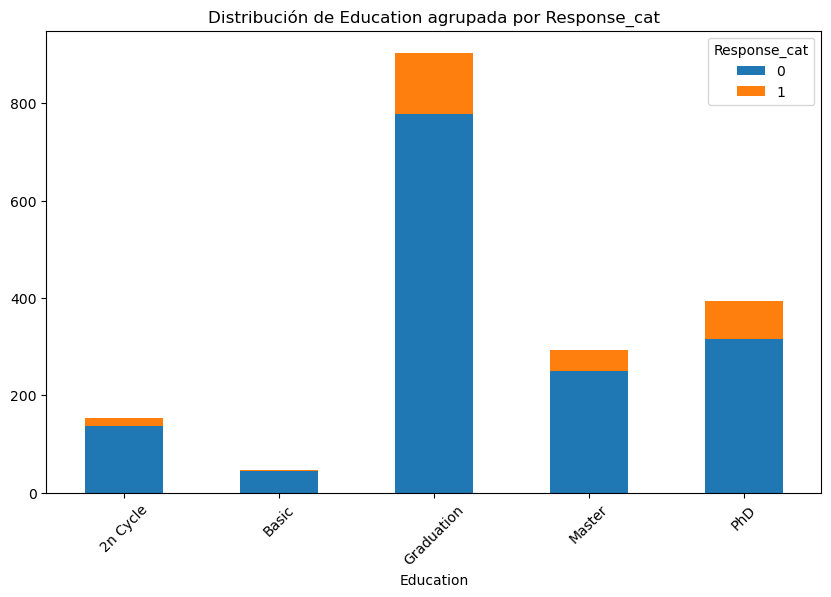

Tabla de contingencia de Education vs Response_cat:
Response_cat    0    1
Education             
2n Cycle      136   17
Basic          44    2
Graduation    777  127
Master        249   45
PhD           315   78

Análisis de Marital_Status vs Response_cat
****************************************


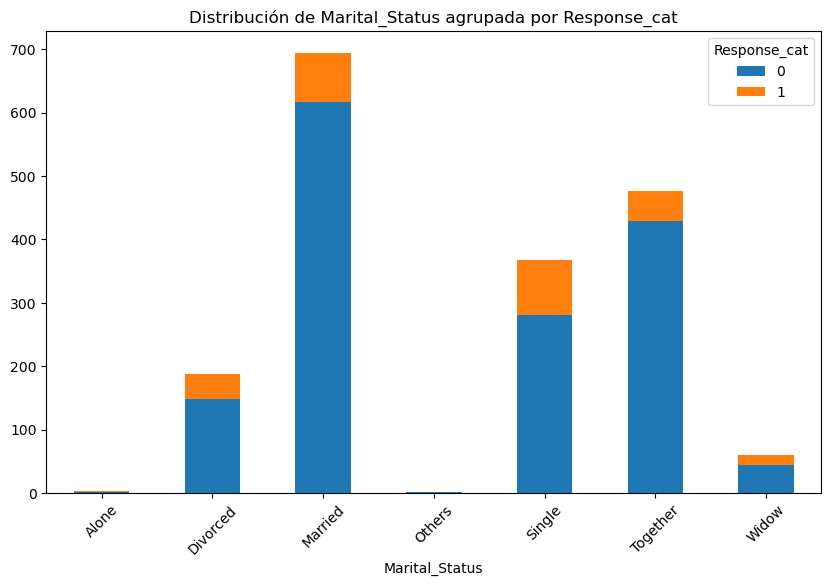

Tabla de contingencia de Marital_Status vs Response_cat:
Response_cat      0   1
Marital_Status         
Alone             2   1
Divorced        148  39
Married         616  78
Others            1   1
Single          281  86
Together        429  48
Widow            44  16

Análisis de AcceptedCmp3 vs Response_cat
****************************************


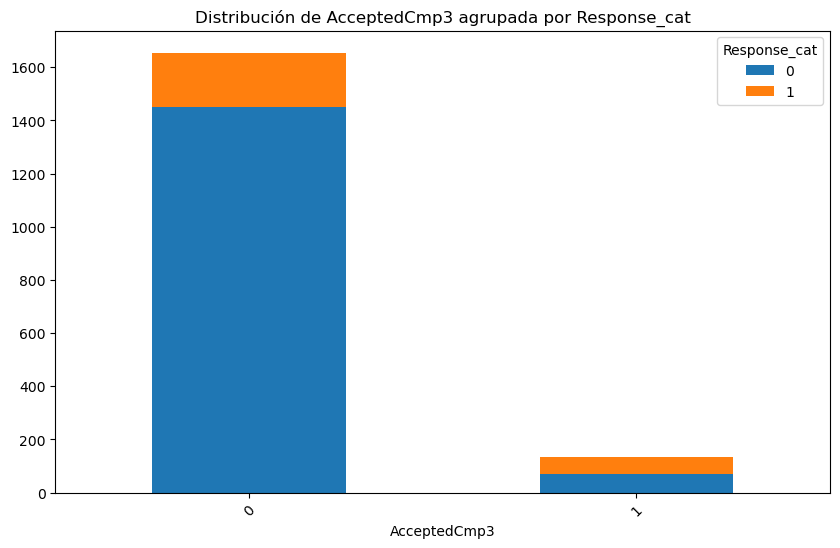

Tabla de contingencia de AcceptedCmp3 vs Response_cat:
Response_cat     0    1
AcceptedCmp3           
0             1452  203
1               69   66

Análisis de AcceptedCmp4 vs Response_cat
****************************************


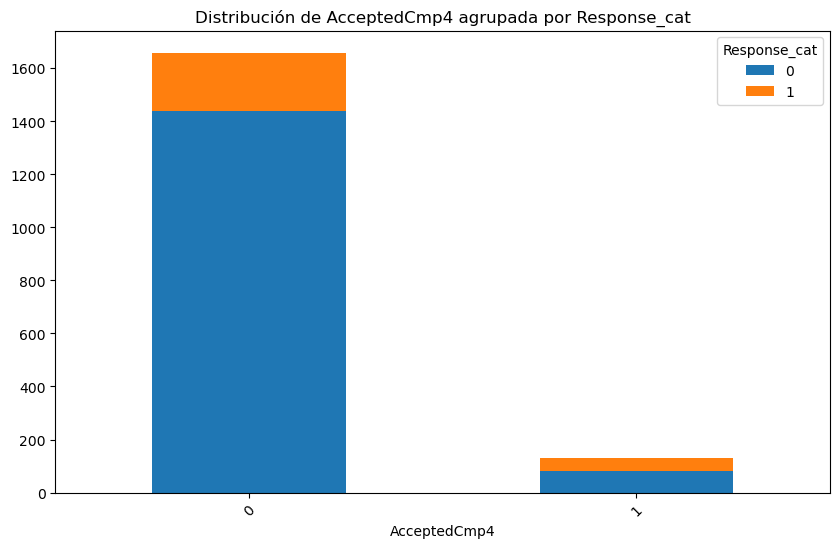

Tabla de contingencia de AcceptedCmp4 vs Response_cat:
Response_cat     0    1
AcceptedCmp4           
0             1440  219
1               81   50

Análisis de AcceptedCmp5 vs Response_cat
****************************************


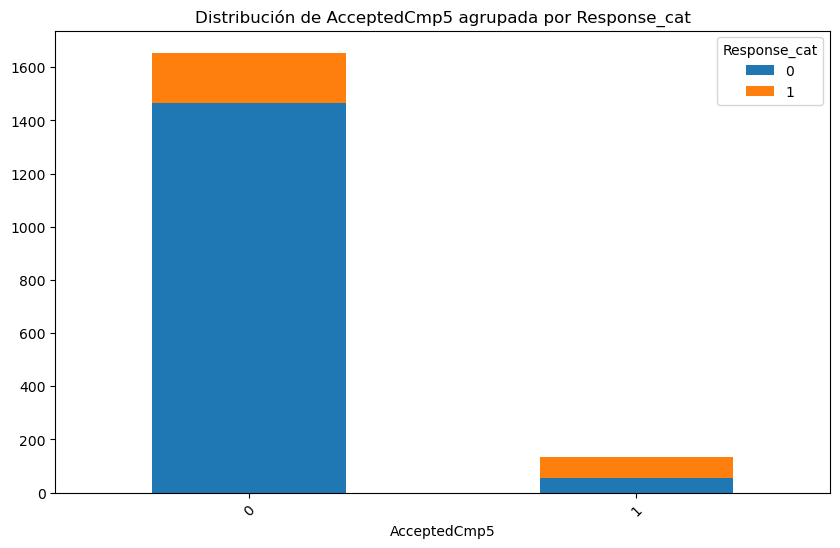

Tabla de contingencia de AcceptedCmp5 vs Response_cat:
Response_cat     0    1
AcceptedCmp5           
0             1467  188
1               54   81

Análisis de AcceptedCmp1 vs Response_cat
****************************************


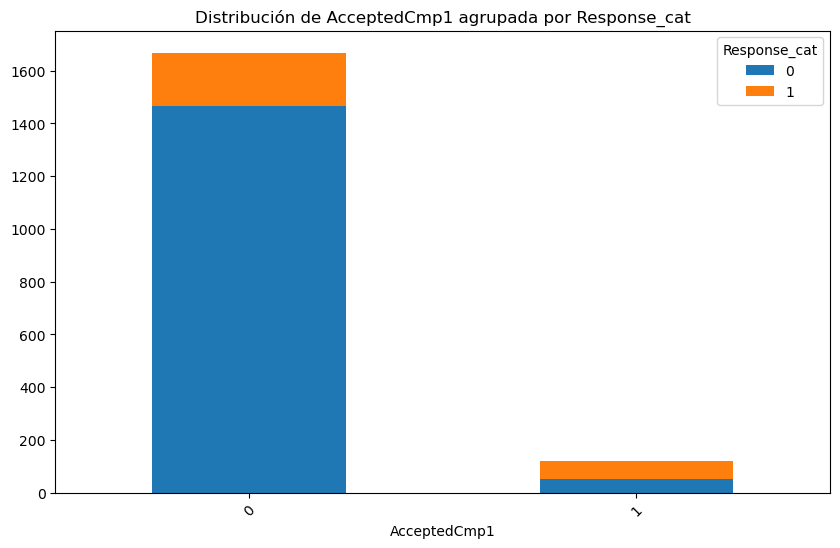

Tabla de contingencia de AcceptedCmp1 vs Response_cat:
Response_cat     0    1
AcceptedCmp1           
0             1468  201
1               53   68

Análisis de AcceptedCmp2 vs Response_cat
****************************************


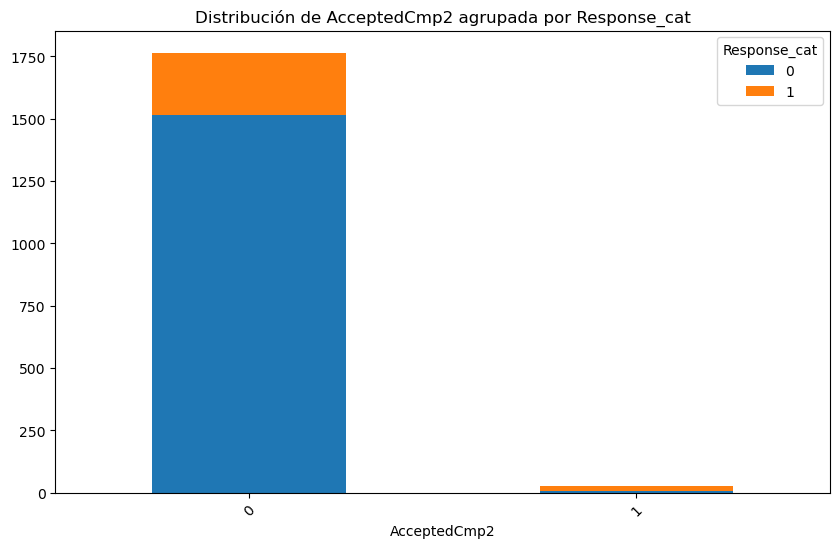

Tabla de contingencia de AcceptedCmp2 vs Response_cat:
Response_cat     0    1
AcceptedCmp2           
0             1513  252
1                8   17

Análisis de Complain vs Response_cat
****************************************


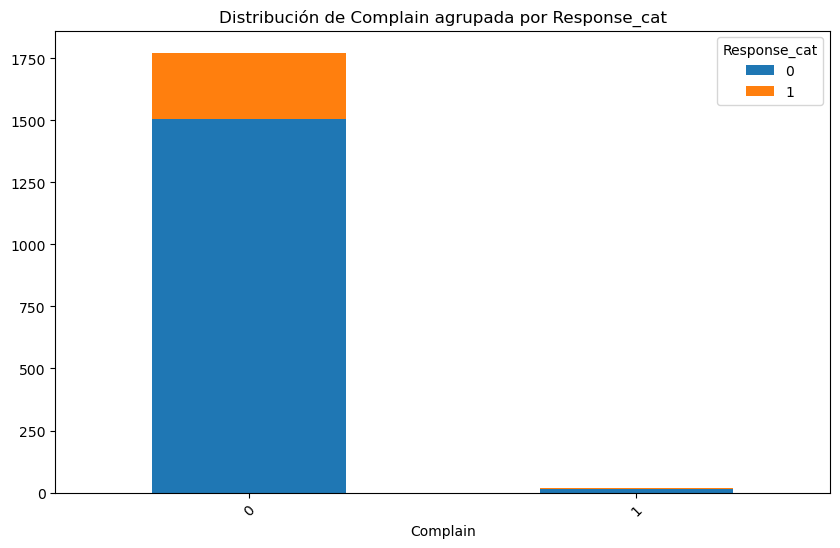

Tabla de contingencia de Complain vs Response_cat:
Response_cat     0    1
Complain               
0             1505  268
1               16    1



In [11]:
analisis_bivariable_categoricas_categorica(train_set,target_cat,features_cat)

### Numéricas con target

Análisis de Year_Birth vs Response
****************************************


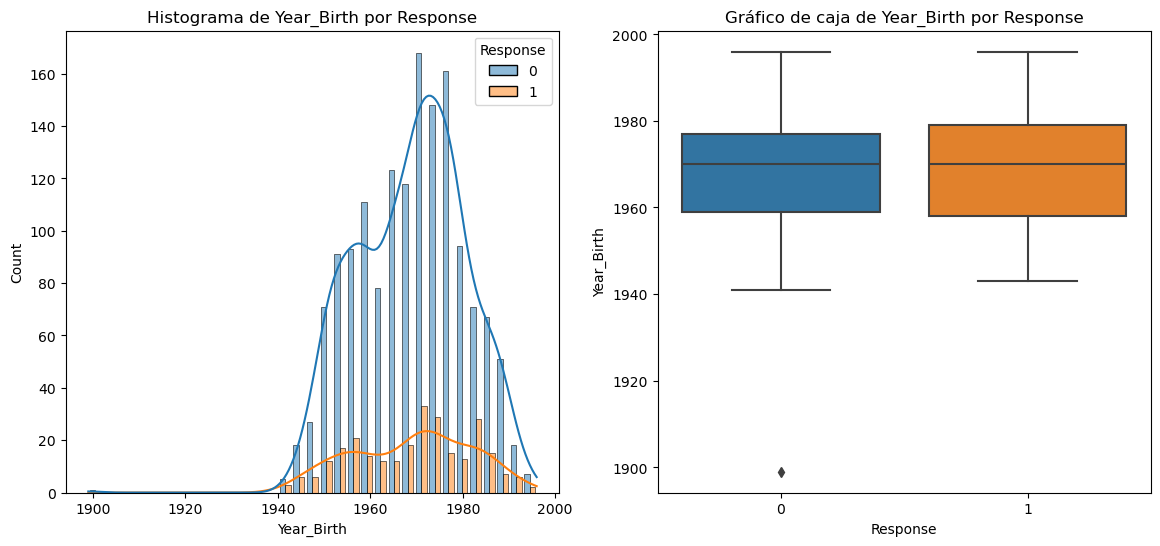

Estadísticos de resumen para Year_Birth por Response:
           count     mean    std     min     25%     50%     75%     max
Response                                                                
0         1521.0  1968.79  11.64  1899.0  1959.0  1970.0  1977.0  1996.0
1          269.0  1969.11  12.75  1943.0  1958.0  1970.0  1979.0  1996.0

Prueba t-student para Year_Birth:
Estadístico t: -0.40
p-valor: 0.688
La variable Year_Birth no está significativamente asociada con Response (p >= 0.05).

Análisis de Income vs Response
****************************************


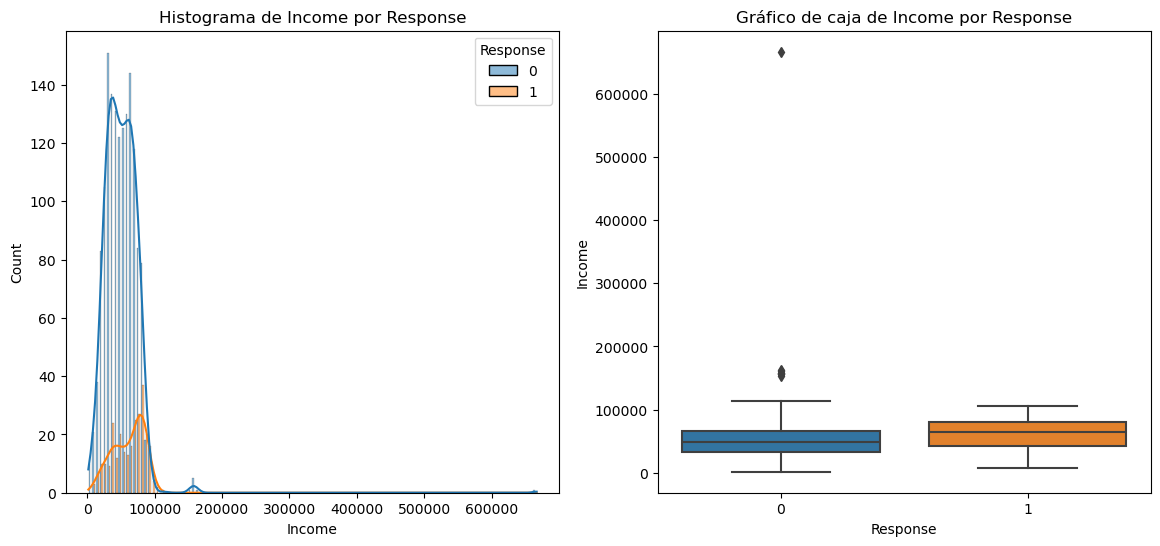

Estadísticos de resumen para Income por Response:
           count      mean       std     min      25%      50%      75%  \
Response                                                                  
0         1521.0  50445.88  26344.97  1730.0  33622.0  49514.0  65685.0   
1          269.0  61245.45  22952.03  7500.0  42014.0  65104.0  80589.0   

               max  
Response            
0         666666.0  
1         105471.0  

Prueba t-student para Income:
Estadístico t: -6.31
p-valor: 0.000
La variable Income está significativamente asociada con Response (p < 0.05). Podría ser útil para el modelo.

Análisis de Kidhome vs Response
****************************************


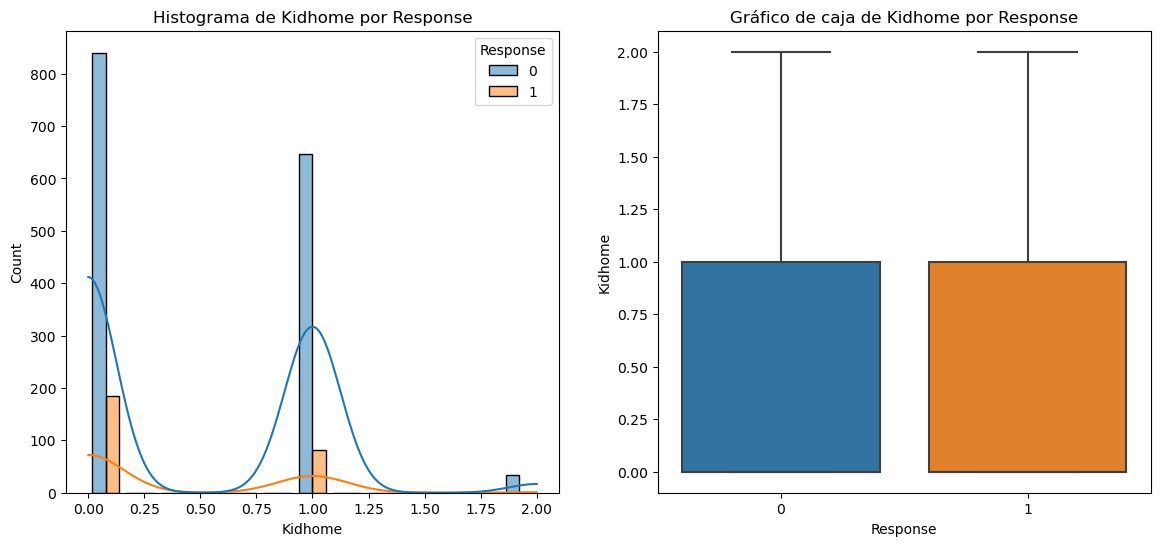

Estadísticos de resumen para Kidhome por Response:
           count  mean   std  min  25%  50%  75%  max
Response                                             
0         1521.0  0.47  0.54  0.0  0.0  0.0  1.0  2.0
1          269.0  0.32  0.48  0.0  0.0  0.0  1.0  2.0

Prueba t-student para Kidhome:
Estadístico t: 4.26
p-valor: 0.000
La variable Kidhome está significativamente asociada con Response (p < 0.05). Podría ser útil para el modelo.

Análisis de Teenhome vs Response
****************************************


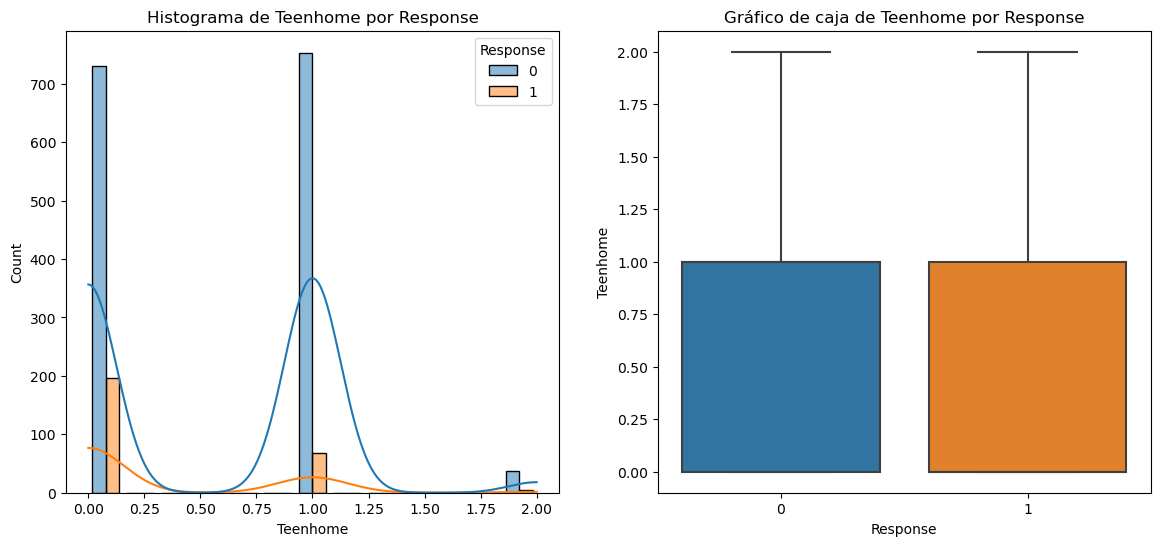

Estadísticos de resumen para Teenhome por Response:
           count  mean   std  min  25%  50%  75%  max
Response                                             
0         1521.0  0.54  0.54  0.0  0.0  1.0  1.0  2.0
1          269.0  0.28  0.48  0.0  0.0  0.0  1.0  2.0

Prueba t-student para Teenhome:
Estadístico t: 7.37
p-valor: 0.000
La variable Teenhome está significativamente asociada con Response (p < 0.05). Podría ser útil para el modelo.

Análisis de Recency vs Response
****************************************


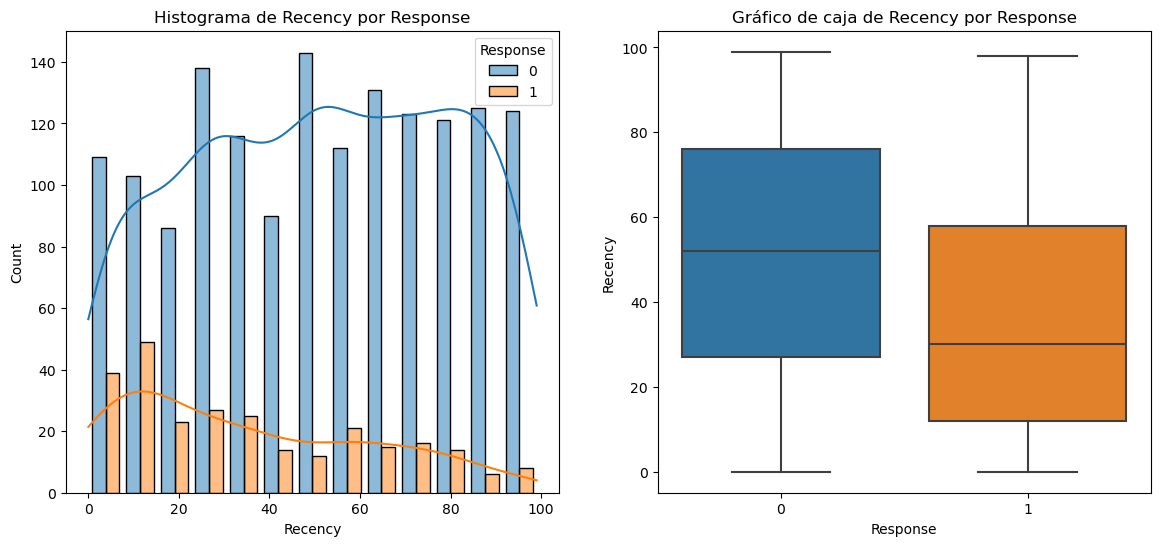

Estadísticos de resumen para Recency por Response:
           count   mean    std  min   25%   50%   75%   max
Response                                                   
0         1521.0  51.11  28.35  0.0  27.0  52.0  76.0  99.0
1          269.0  35.56  27.44  0.0  12.0  30.0  58.0  98.0

Prueba t-student para Recency:
Estadístico t: 8.33
p-valor: 0.000
La variable Recency está significativamente asociada con Response (p < 0.05). Podría ser útil para el modelo.

Análisis de MntWines vs Response
****************************************


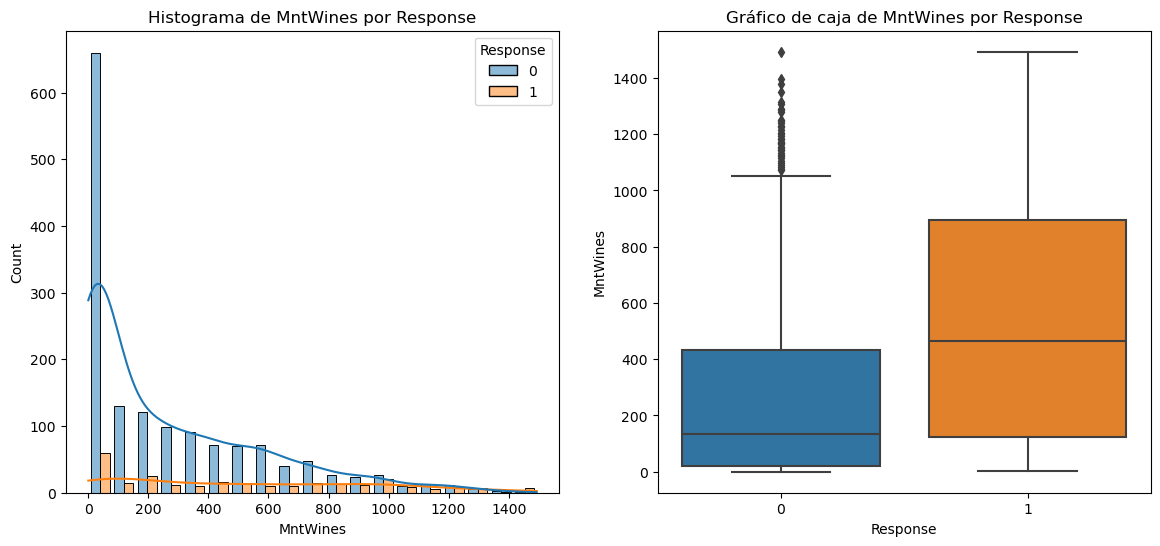

Estadísticos de resumen para MntWines por Response:
           count    mean     std  min    25%    50%    75%     max
Response                                                          
0         1521.0  264.66  306.39  0.0   20.0  135.0  432.0  1493.0
1          269.0  521.50  428.38  1.0  124.0  464.0  896.0  1492.0

Prueba t-student para MntWines:
Estadístico t: -11.85
p-valor: 0.000
La variable MntWines está significativamente asociada con Response (p < 0.05). Podría ser útil para el modelo.

Análisis de MntFruits vs Response
****************************************


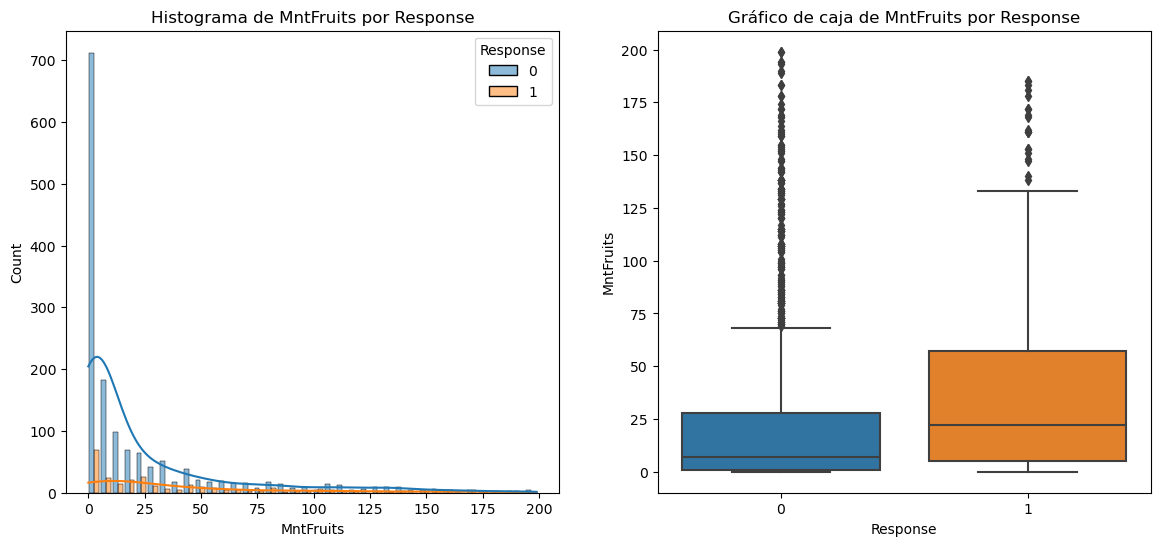

Estadísticos de resumen para MntFruits por Response:
           count   mean    std  min  25%   50%   75%    max
Response                                                   
0         1521.0  23.73  38.06  0.0  1.0   7.0  28.0  199.0
1          269.0  40.86  47.77  0.0  5.0  22.0  57.0  185.0

Prueba t-student para MntFruits:
Estadístico t: -6.53
p-valor: 0.000
La variable MntFruits está significativamente asociada con Response (p < 0.05). Podría ser útil para el modelo.

Análisis de MntMeatProducts vs Response
****************************************


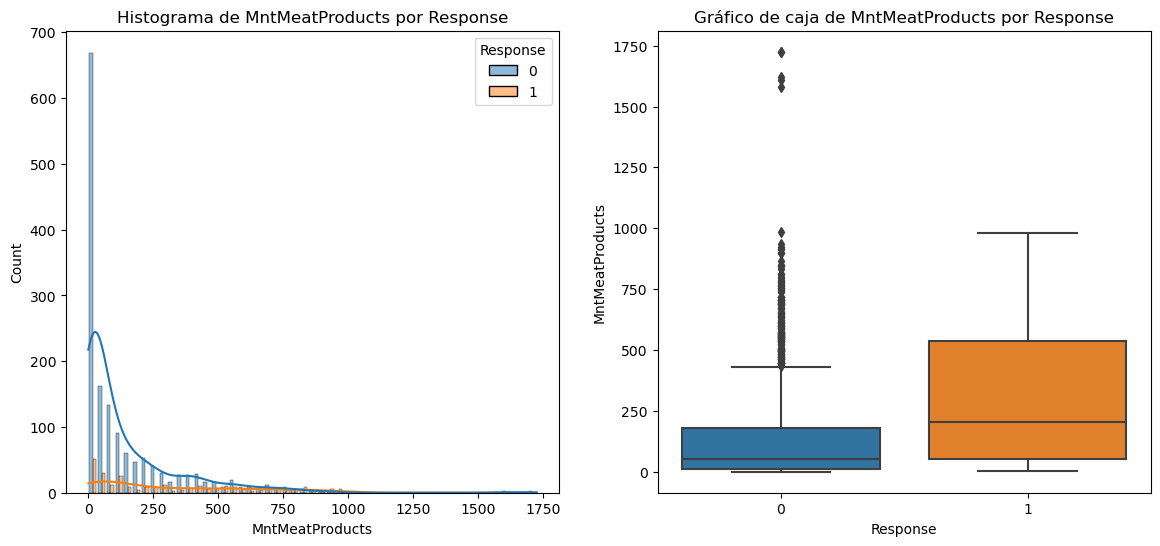

Estadísticos de resumen para MntMeatProducts por Response:
           count    mean     std  min   25%    50%    75%     max
Response                                                         
0         1521.0  140.09  204.47  0.0  13.0   51.0  181.0  1725.0
1          269.0  311.70  293.54  1.0  53.0  206.0  536.0   981.0

Prueba t-student para MntMeatProducts:
Estadístico t: -11.79
p-valor: 0.000
La variable MntMeatProducts está significativamente asociada con Response (p < 0.05). Podría ser útil para el modelo.

Análisis de MntFishProducts vs Response
****************************************


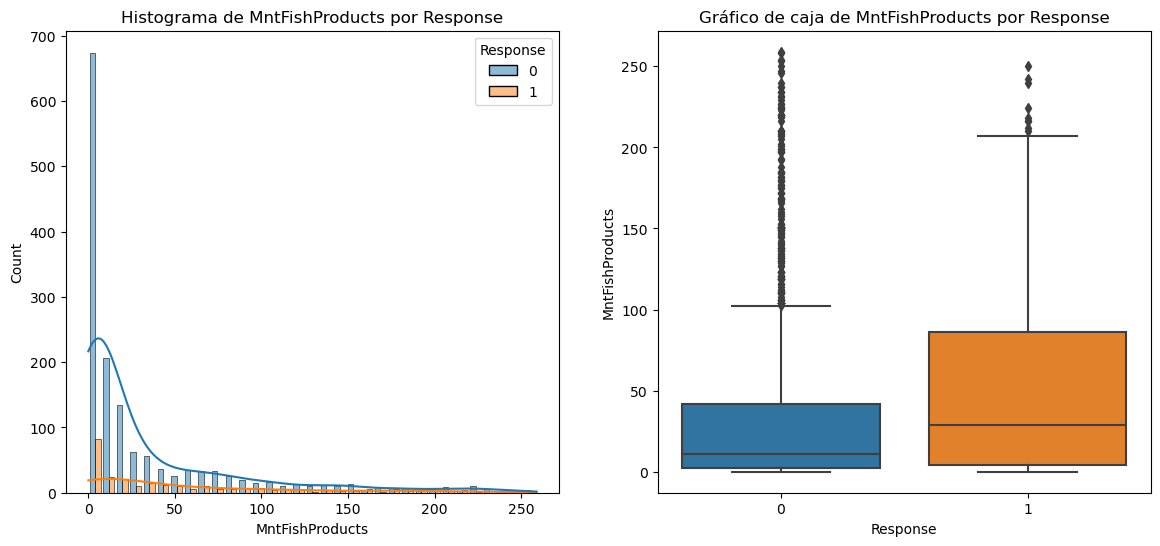

Estadísticos de resumen para MntFishProducts por Response:
           count   mean    std  min  25%   50%   75%    max
Response                                                   
0         1521.0  33.81  52.03  0.0  2.0  11.0  42.0  259.0
1          269.0  54.24  62.81  0.0  4.0  29.0  86.0  250.0

Prueba t-student para MntFishProducts:
Estadístico t: -5.74
p-valor: 0.000
La variable MntFishProducts está significativamente asociada con Response (p < 0.05). Podría ser útil para el modelo.

Análisis de MntSweetProducts vs Response
****************************************


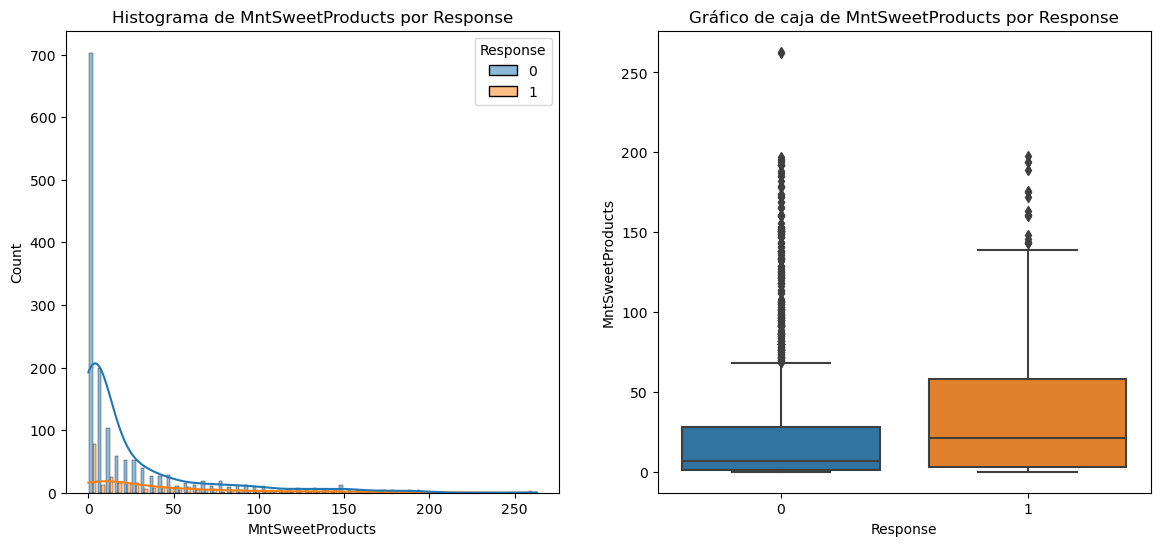

Estadísticos de resumen para MntSweetProducts por Response:
           count   mean    std  min  25%   50%   75%    max
Response                                                   
0         1521.0  24.13  39.66  0.0  1.0   7.0  28.0  263.0
1          269.0  40.07  47.12  0.0  3.0  21.0  58.0  198.0

Prueba t-student para MntSweetProducts:
Estadístico t: -5.90
p-valor: 0.000
La variable MntSweetProducts está significativamente asociada con Response (p < 0.05). Podría ser útil para el modelo.

Análisis de MntGoldProds vs Response
****************************************


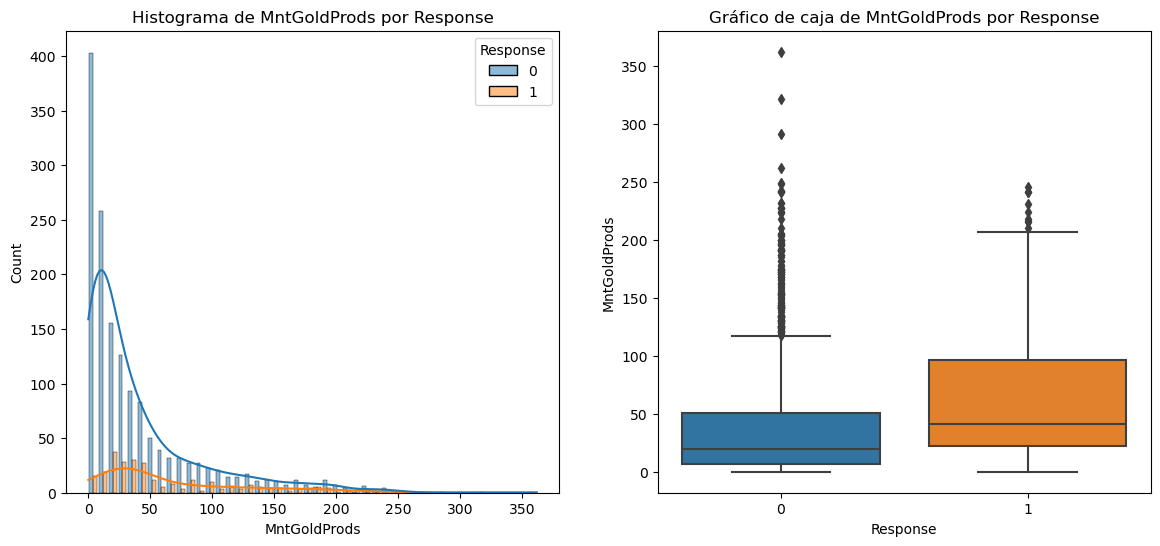

Estadísticos de resumen para MntGoldProds por Response:
           count   mean    std  min   25%   50%   75%    max
Response                                                    
0         1521.0  40.25  50.47  0.0   7.0  20.0  51.0  362.0
1          269.0  65.26  59.18  0.0  22.0  41.0  96.0  245.0

Prueba t-student para MntGoldProds:
Estadístico t: -7.29
p-valor: 0.000
La variable MntGoldProds está significativamente asociada con Response (p < 0.05). Podría ser útil para el modelo.

Análisis de NumDealsPurchases vs Response
****************************************


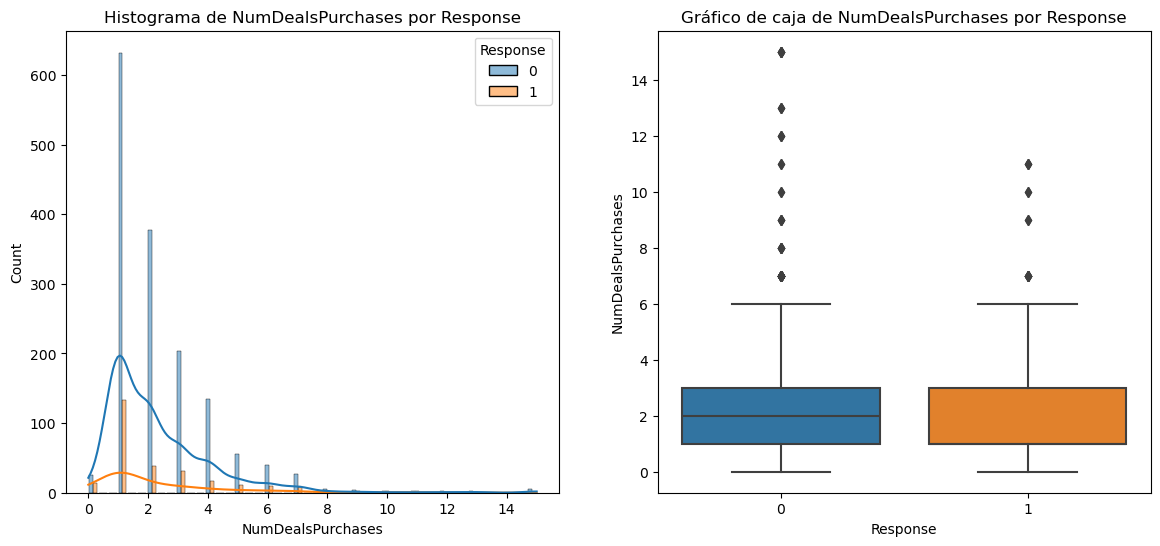

Estadísticos de resumen para NumDealsPurchases por Response:
           count  mean   std  min  25%  50%  75%   max
Response                                              
0         1521.0  2.32  1.90  0.0  1.0  2.0  3.0  15.0
1          269.0  2.28  2.11  0.0  1.0  1.0  3.0  11.0

Prueba t-student para NumDealsPurchases:
Estadístico t: 0.38
p-valor: 0.706
La variable NumDealsPurchases no está significativamente asociada con Response (p >= 0.05).

Análisis de NumWebPurchases vs Response
****************************************


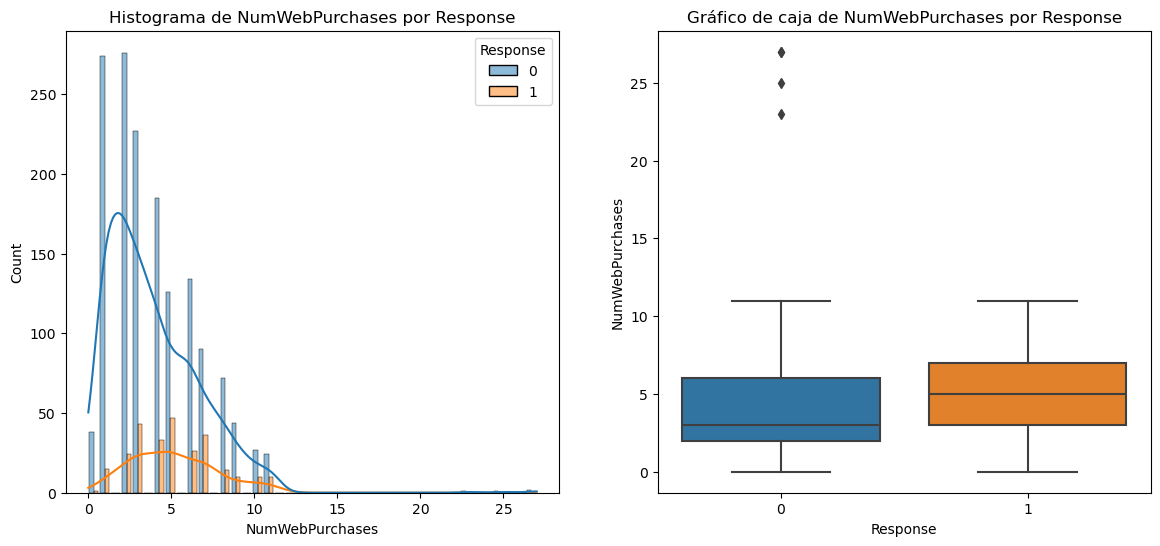

Estadísticos de resumen para NumWebPurchases por Response:
           count  mean   std  min  25%  50%  75%   max
Response                                              
0         1521.0  3.89  2.82  0.0  2.0  3.0  6.0  27.0
1          269.0  5.13  2.55  0.0  3.0  5.0  7.0  11.0

Prueba t-student para NumWebPurchases:
Estadístico t: -6.70
p-valor: 0.000
La variable NumWebPurchases está significativamente asociada con Response (p < 0.05). Podría ser útil para el modelo.

Análisis de NumCatalogPurchases vs Response
****************************************


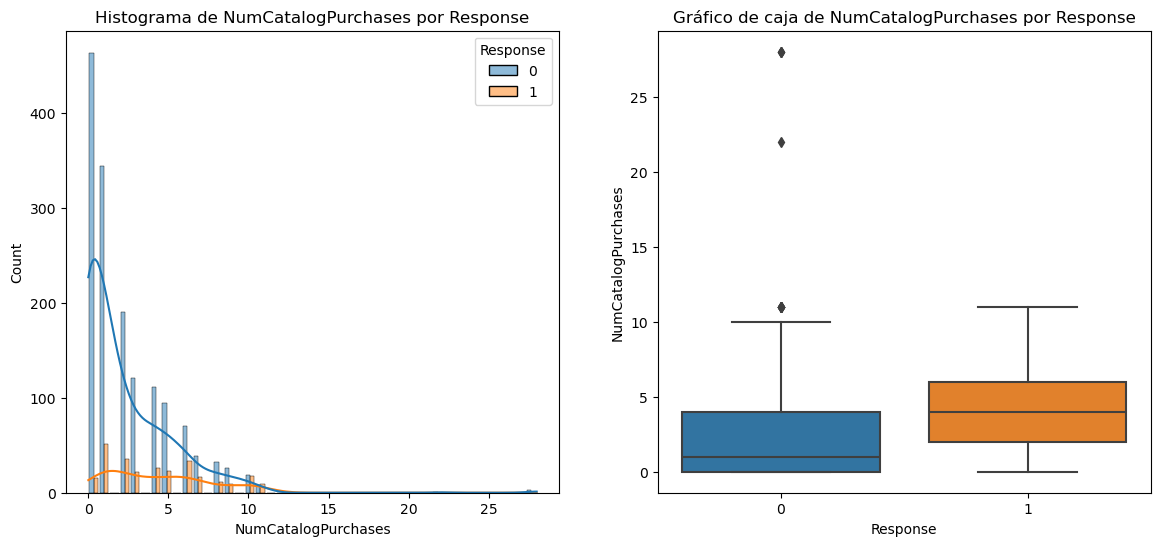

Estadísticos de resumen para NumCatalogPurchases por Response:
           count  mean   std  min  25%  50%  75%   max
Response                                              
0         1521.0  2.35  2.84  0.0  0.0  1.0  4.0  28.0
1          269.0  4.35  3.13  0.0  2.0  4.0  6.0  11.0

Prueba t-student para NumCatalogPurchases:
Estadístico t: -10.53
p-valor: 0.000
La variable NumCatalogPurchases está significativamente asociada con Response (p < 0.05). Podría ser útil para el modelo.

Análisis de NumStorePurchases vs Response
****************************************


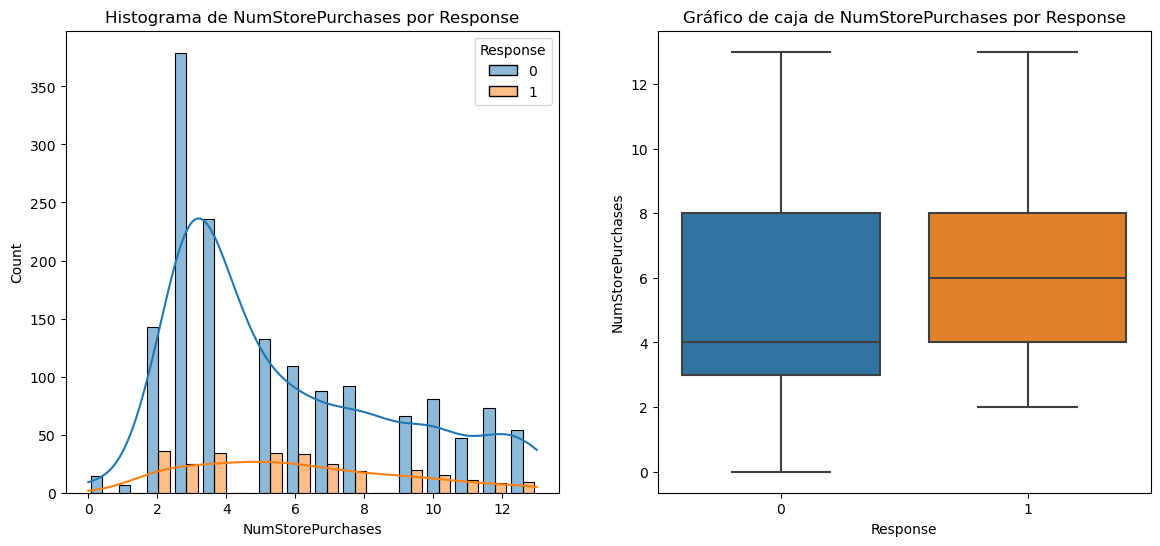

Estadísticos de resumen para NumStorePurchases por Response:
           count  mean   std  min  25%  50%  75%   max
Response                                              
0         1521.0  5.61  3.25  0.0  3.0  4.0  8.0  13.0
1          269.0  6.10  3.05  2.0  4.0  6.0  8.0  13.0

Prueba t-student para NumStorePurchases:
Estadístico t: -2.30
p-valor: 0.021
La variable NumStorePurchases está significativamente asociada con Response (p < 0.05). Podría ser útil para el modelo.

Análisis de NumWebVisitsMonth vs Response
****************************************


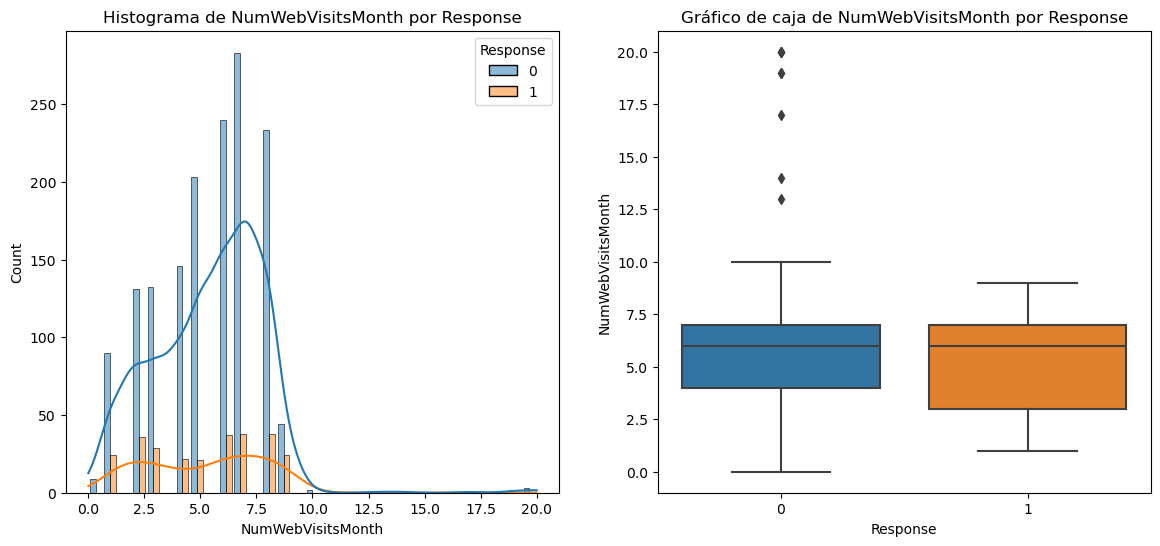

Estadísticos de resumen para NumWebVisitsMonth por Response:
           count  mean   std  min  25%  50%  75%   max
Response                                              
0         1521.0  5.38  2.42  0.0  4.0  6.0  7.0  20.0
1          269.0  5.14  2.56  1.0  3.0  6.0  7.0   9.0

Prueba t-student para NumWebVisitsMonth:
Estadístico t: 1.49
p-valor: 0.137
La variable NumWebVisitsMonth no está significativamente asociada con Response (p >= 0.05).

Análisis de Response vs Response
****************************************


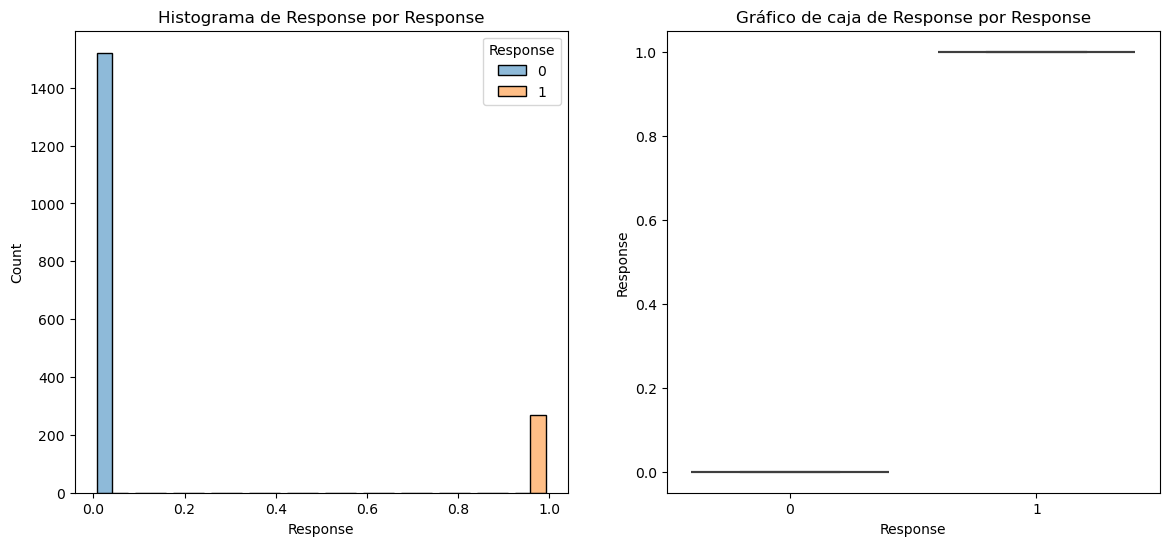

Estadísticos de resumen para Response por Response:
           count  mean  std  min  25%  50%  75%  max
Response                                            
0         1521.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
1          269.0   1.0  0.0  1.0  1.0  1.0  1.0  1.0

Prueba t-student para Response:
Estadístico t: -inf
p-valor: 0.000
La variable Response está significativamente asociada con Response (p < 0.05). Podría ser útil para el modelo.

Análisis de age vs Response
****************************************


c:\Users\Alfonso\miniconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:523: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


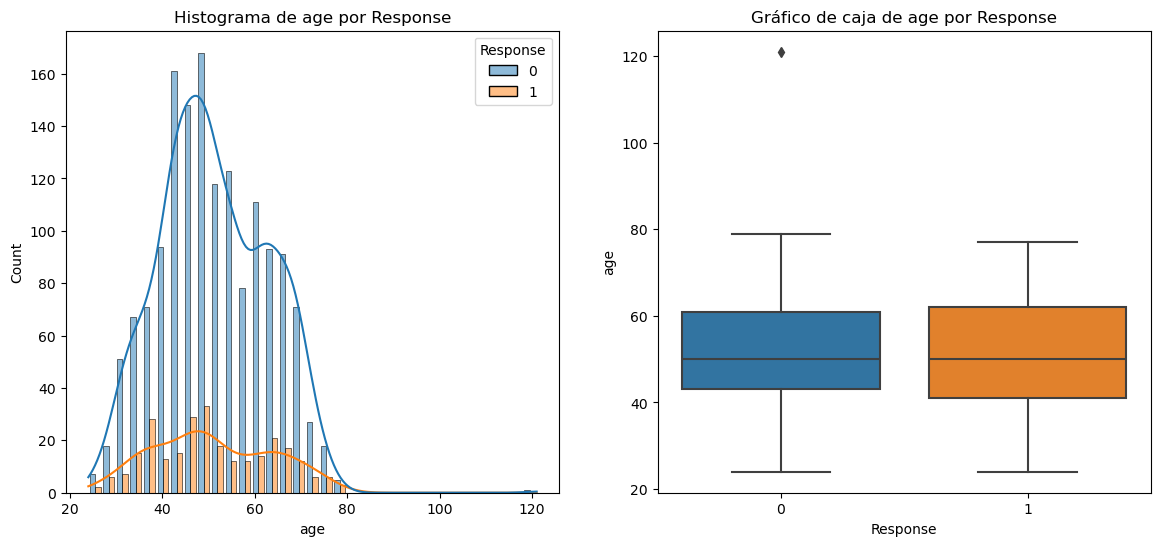

Estadísticos de resumen para age por Response:
           count   mean    std   min   25%   50%   75%    max
Response                                                     
0         1521.0  51.21  11.64  24.0  43.0  50.0  61.0  121.0
1          269.0  50.89  12.75  24.0  41.0  50.0  62.0   77.0

Prueba t-student para age:
Estadístico t: 0.40
p-valor: 0.688
La variable age no está significativamente asociada con Response (p >= 0.05).

Análisis de customes_seniority vs Response
****************************************


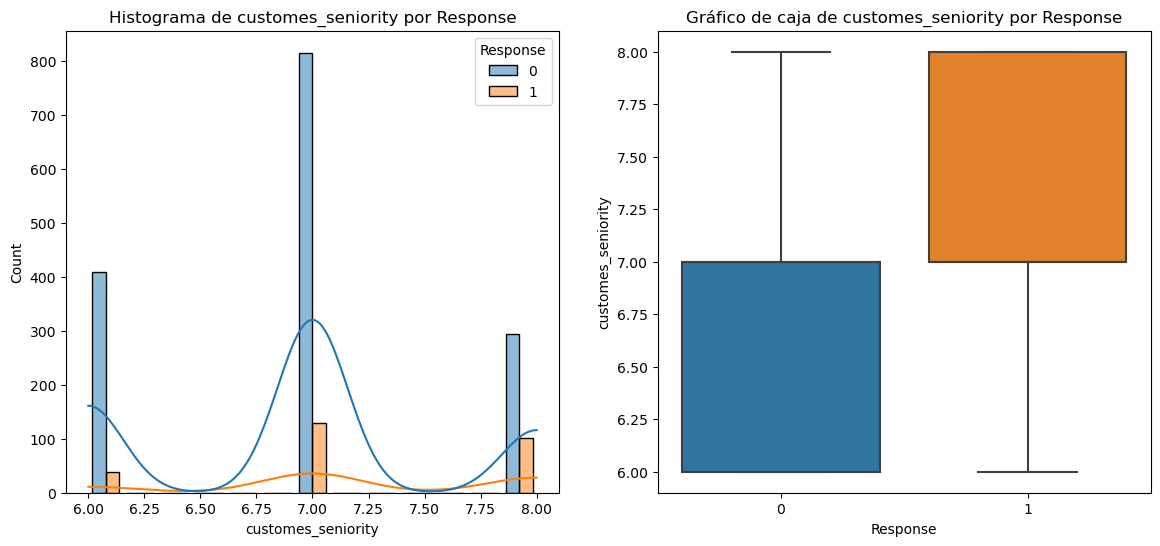

Estadísticos de resumen para customes_seniority por Response:
           count  mean   std  min  25%  50%  75%  max
Response                                             
0         1521.0  6.92  0.68  6.0  6.0  7.0  7.0  8.0
1          269.0  7.23  0.68  6.0  7.0  7.0  8.0  8.0

Prueba t-student para customes_seniority:
Estadístico t: -6.83
p-valor: 0.000
La variable customes_seniority está significativamente asociada con Response (p < 0.05). Podría ser útil para el modelo.

Análisis de Household_members vs Response
****************************************


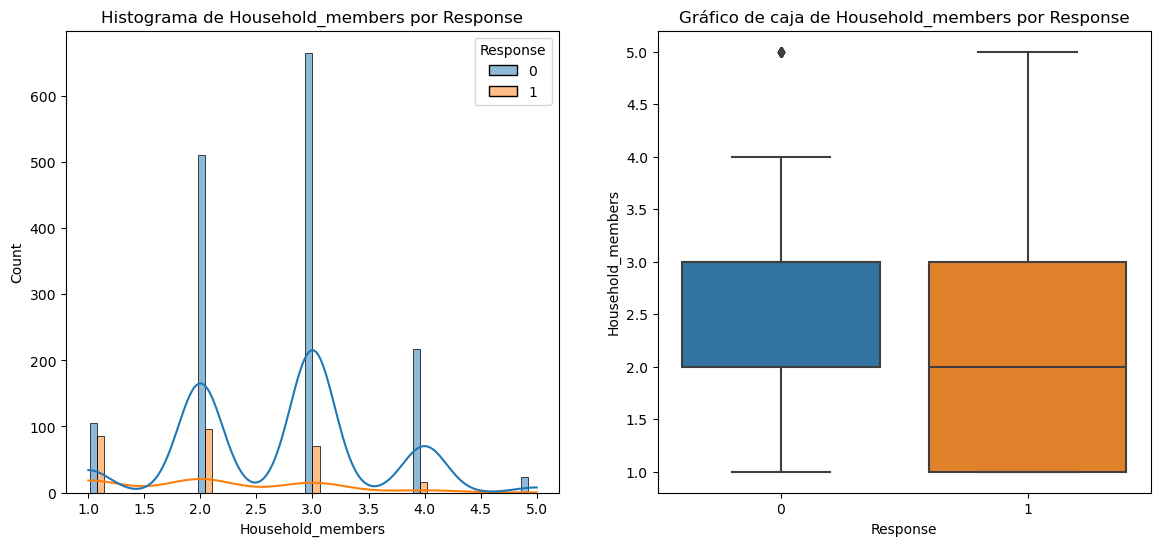

Estadísticos de resumen para Household_members por Response:
           count  mean   std  min  25%  50%  75%  max
Response                                             
0         1521.0  2.70  0.85  1.0  2.0  3.0  3.0  5.0
1          269.0  2.07  0.92  1.0  1.0  2.0  3.0  5.0

Prueba t-student para Household_members:
Estadístico t: 11.03
p-valor: 0.000
La variable Household_members está significativamente asociada con Response (p < 0.05). Podría ser útil para el modelo.

Análisis de Total_amount vs Response
****************************************


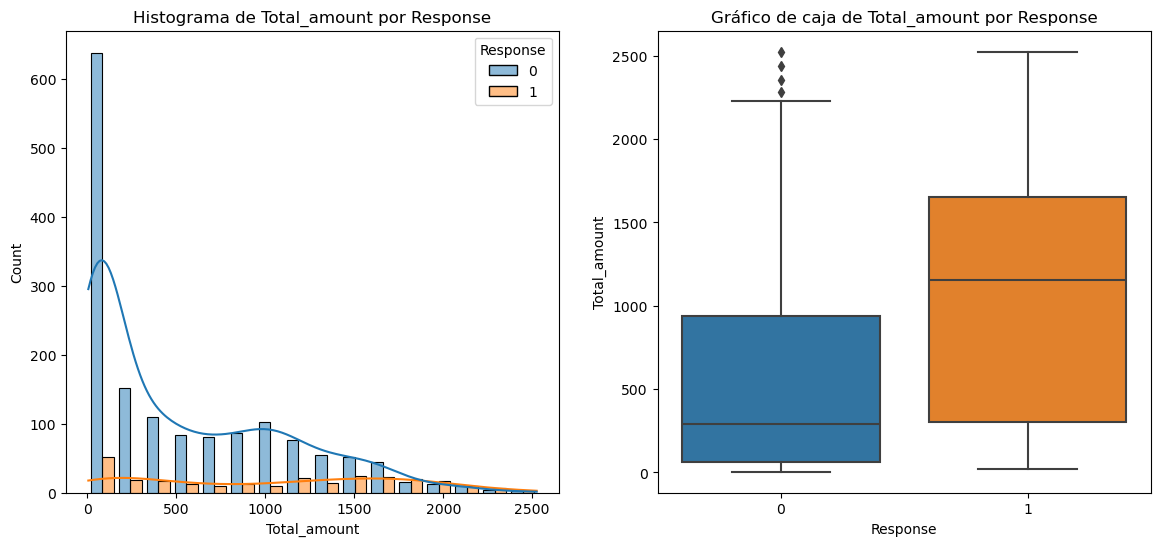

Estadísticos de resumen para Total_amount por Response:
           count     mean     std   min    25%     50%     75%     max
Response                                                              
0         1521.0   526.67  550.19   5.0   60.0   292.0   937.0  2525.0
1          269.0  1033.63  722.39  18.0  302.0  1152.0  1655.0  2525.0

Prueba t-student para Total_amount:
Estadístico t: -13.23
p-valor: 0.000
La variable Total_amount está significativamente asociada con Response (p < 0.05). Podría ser útil para el modelo.

Análisis de Total_purchase vs Response
****************************************


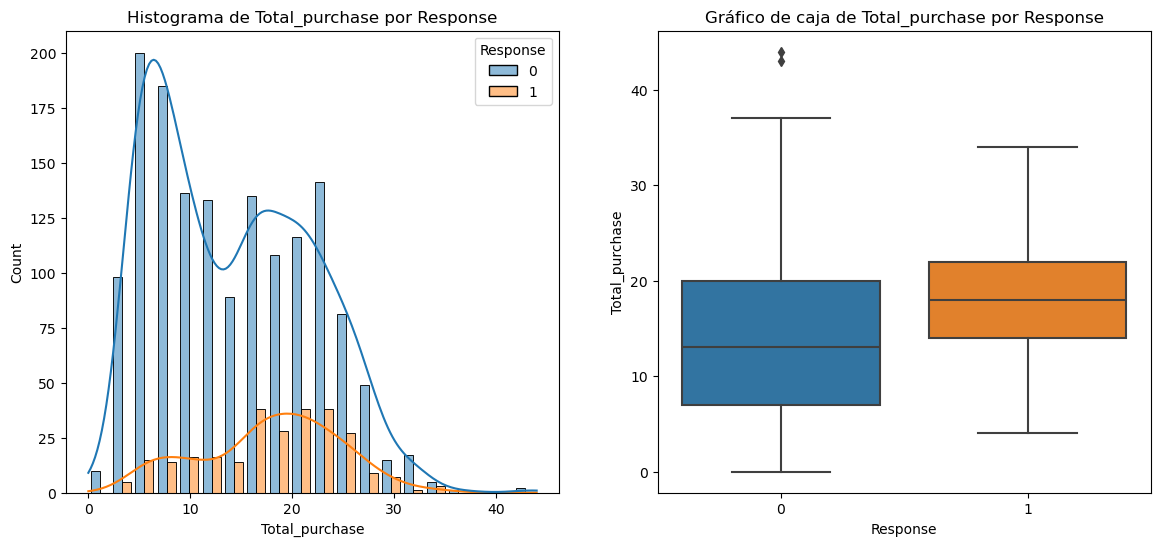

Estadísticos de resumen para Total_purchase por Response:
           count   mean   std  min   25%   50%   75%   max
Response                                                  
0         1521.0  14.17  7.69  0.0   7.0  13.0  20.0  44.0
1          269.0  17.86  6.73  4.0  14.0  18.0  22.0  34.0

Prueba t-student para Total_purchase:
Estadístico t: -7.37
p-valor: 0.000
La variable Total_purchase está significativamente asociada con Response (p < 0.05). Podría ser útil para el modelo.

Análisis de Median_amount_purchase vs Response
****************************************


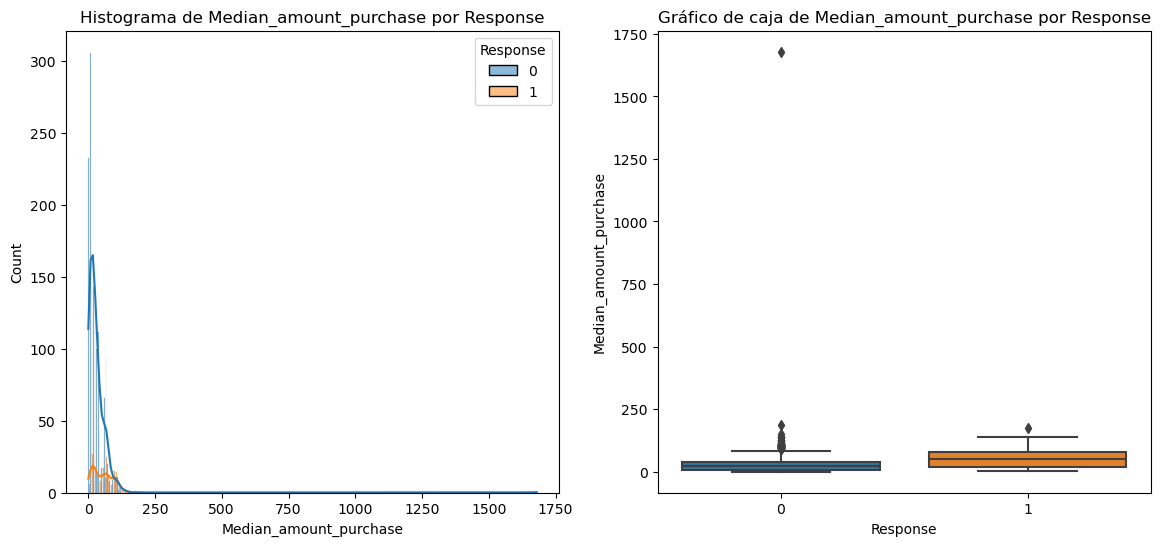

Estadísticos de resumen para Median_amount_purchase por Response:
           count   mean   std   min    25%    50%    75%     max
Response                                                        
0         1521.0    inf   NaN  0.53   8.60  20.90  39.02     inf
1          269.0  52.79  35.9  4.50  18.59  52.56  77.75  173.23

Prueba t-student para Median_amount_purchase:
Estadístico t: nan
p-valor: nan
La variable Median_amount_purchase no está significativamente asociada con Response (p >= 0.05).

Análisis de Total_cmp vs Response
****************************************


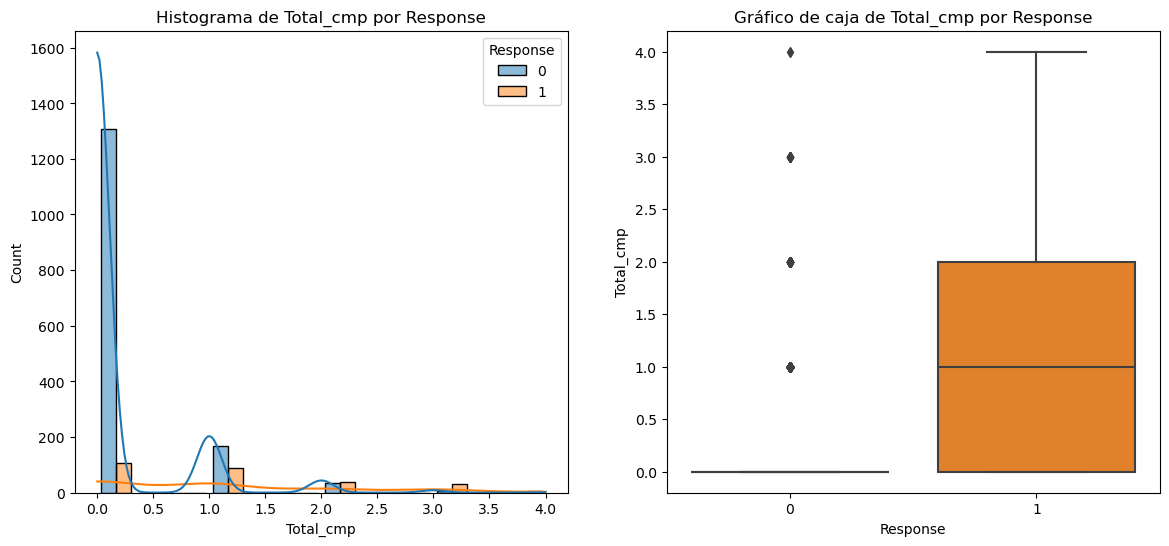

Estadísticos de resumen para Total_cmp por Response:
           count  mean   std  min  25%  50%  75%  max
Response                                             
0         1521.0  0.17  0.48  0.0  0.0  0.0  0.0  4.0
1          269.0  1.05  1.11  0.0  0.0  1.0  2.0  4.0

Prueba t-student para Total_cmp:
Estadístico t: -21.51
p-valor: 0.000
La variable Total_cmp está significativamente asociada con Response (p < 0.05). Podría ser útil para el modelo.

Análisis de Total_%_cmp vs Response
****************************************


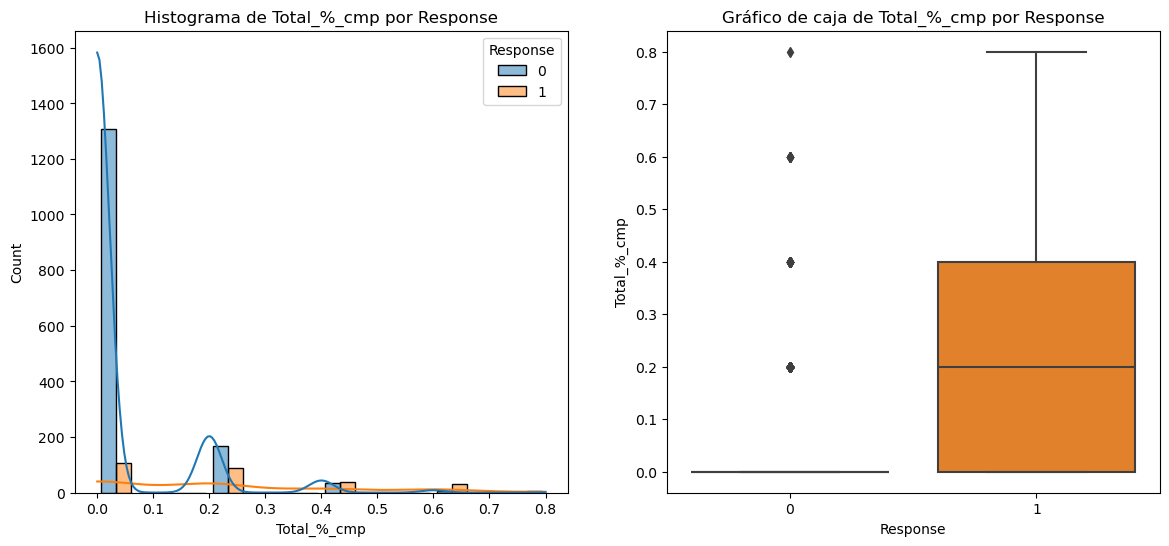

Estadísticos de resumen para Total_%_cmp por Response:
           count  mean   std  min  25%  50%  75%  max
Response                                             
0         1521.0  0.03  0.10  0.0  0.0  0.0  0.0  0.8
1          269.0  0.21  0.22  0.0  0.0  0.2  0.4  0.8

Prueba t-student para Total_%_cmp:
Estadístico t: -21.51
p-valor: 0.000
La variable Total_%_cmp está significativamente asociada con Response (p < 0.05). Podría ser útil para el modelo.

Las features correlacionadas son: ['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'Response', 'customes_seniority', 'Household_members', 'Total_amount', 'Total_purchase', 'Total_cmp', 'Total_%_cmp']
Las features NO correlacionadas son: ['Year_Birth', 'NumDealsPurchases', 'NumWebVisitsMonth', 'age', 'Median_amount_purchase']


In [12]:
analisis_bivariable_numericas_categorica(train_set,target,features_num)